<a href="https://colab.research.google.com/github/geomyll33/Beautez/blob/master/%CE%95%CE%A5ATH_project_STATS_ARIMA_Profet_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Εφαρμογή βραχυπρόθεσμης πρόβλεψης ζήτησης αστικού νερού λαμβάνοντας υπόψη πολλαπλούς παράγοντες.\
 Περίπτωση της πόλης της Θεσσαλονίκης** 

# **Περιεχόμενα**



Εισαγωγή

Ορισμός του προβλήματος

Συλλογή δεδομένων 

Προεπεξεργασία δεδομένων

Χρονολογική σειρά και ισοδύναμες χρονικές Timestamps

Χειρισμός Missing Values

Δειγματοληψία

Stationarity

Feature Engineering

Χαρακτηριστικά χρόνου

Αποσύνθεση

Καθυστέρηση

Διερευνητική ανάλυση Δεδομένων

Ανάλυση Αυτοσυσχέτισης

Cross Validation

Μοντέλα

Μοντέλα για Univariate Time Series

Naive προσέγγιση

Κινητός μέσος όρος 

Εκθετική εξομάλυνση (IN WORK)

ARIMA

Μοντέλα για Multivariate Time Series

Vector Autoregression (VAR)


# **Εισαγωγή**



Η ΕΥΑΘ, η δευτερη μεγαλύτερη εταιρεία ύδρευσης και αποχέτευσης στην Ελλάδα, διαχειρίζεται ένα πολύπλοκο σύστημα υδροδότησης που ξεκινά από τους ταμιευτήρες νερού και συνεχίζει στις Μονάδες Επεξεργασίας Νερού, στα αντλιοστασια, δεξαμενές νερού, έως και τα υδρόμετρα που υδρεύουν μεγάλο πλήθος νοικοκυριών και επιχειρησεων.


Ταυτόχρονα, για την εξυπηρέτηση των σκοπών της, η ΕΥΑΘ διαθέτει ενα σύγχρονο δίκτυο διανομής νερού που το διαχειριζεται μεσω συστήματος SCADA σε σύνολο περίπου 30 αυτοματοποιημένων αντλιοστασίων και δεξαμενών στην ευρυτερη περιοχη του νομού Θεσσαλονικης  όπου διακινεί  καθημερινά περίπου
300 με 320 χιλίαδες κυβικά νερού ανα 24ωρο  σε όλη την Θεσσαλονίκη.

Η συστηματική παρακολούθηση της λειτουργίας των αντλιοστασιων και η σωστή πρόβλεψη επάρκειας νερού σε όλες τις περιοχές με διαφορετική ζήτηση νερού   αποτελεί μία πρόκληση και  σε πολλές περιπτώσεις  ο έγκαιρος εντοπισμός μιας ολικής ή επιμέρους ζήτησης νερού, θα μπορούσε να είναι ενδεικτικός για καλύτερη διανομή με μικρότερο ενεργειακό κόστος και  άσκοπης σπατάλης νερού. Ο περιορισμός αυτού του φαινομένου αποτελεί προτεραιότητα για την Εταιρεία, για οικονομικούς και περιβαλλοντικούς λόγους.

Η ικανοποιητική προσέγγιση της μελλοντικής ζήτησης νερού  μπορεί να επιτρέψει στην εταιρεία να ικανοποιεί πιο συστημικά  τους στόχους παραγωγής και διανομής του νερού. Με τον τρόπο αυτό, μπορεί να βελτιωθεί η λειτουργική αποτελεσματικότητα της εταιρείας,  όσο και μειώνοντας το ίδιο το κόστος διανομής του νερού.
Σκοπός αυτής της εργασίας είναι η ανάπτυξη μηχανισμών οι οποίοι θα αναγνωρίζουν πιθανά μοτίβα ζήτησης νερού και θα υλοποιούν μοντέλα πρόβλεψης. Τα εργαλεία αυτά θα βασιστούν σε ένα πλήθος παραμέτρων σχετικές με το ιστορικό των μετρήσεων, και άλλα χαρακτηριστικά του εξωτερικούπεριβάλλοντος.



Τα δεδομένα μας είναι μια συλλογή από  δεδομένα που εξαρτώνται από το χρόνο. Αυτό σημαίνει ότι κάθε σημείο δεδομένων έχει αντιστοιχιστεί σε μια συγκεκριμένη χρονική σήμανση. Στην ιδανική περίπτωση, αυτά τα σημεία δεδομένων είναι σε χρονολογική σειρά και σε χρονικά διαστήματα (π.χ. κάθε λεπτό ή καθημερινά). Το πρόβλημα πρόβλεψης χρονοσειρών αναλύει μοτίβα των προηγούμενων δεδομένων για να κάνει προβλέψεις για το μέλλον. Οι χρονοσειρές εξαρτώνται από το χρόνο και δείχνουν συγκεκριμένα χαρακτηριστικά, όπως η τάση και η εποχικότητα.

# **Ορισμός του προβλήματος**

Να δημιουργηθεί ένας αλγόριθμος ο οποίος, με τη βοήθεια ιστορικών δεδομένων μετρήσεων, να προβλέπει τη μελλοντική κατανάλωση μιας παροχής σε βραχυππρόθεσμο ορίζοντα, π.χ. 1 εβδομάδα;

Οι προβλέψεις θα βασίζονται σε ένα πλήθος παραμέτρων σχετικές με το ιστορικό των μετρήσεων ανα δεξαμενή,  αλλά και δεδομένα τρίτων πηγών. Ένα έξυπνο μοντέλο λειτουργίας διανομής νερού στις δεξαμένές μπορεί να συνεισφέρει ουσιαστικά στην έγκαιρη και αποτελεσματική διακίνηση του νερού και, κατά συνέπεια, στη μείωση της σπατάλης νερού. Επιπλέον, η πρόβλεψη της  ζήτησης νερού μπορεί να βελτιώσει την αποδοτικότητα της επιχείρησης.

# **Συλλογή δεδομένων**


Δεν υπάρχει ground truth, επομένως πρέπει να εξαχθούν προβλέψεις, με βάση τα υπάρχοντα δεδομένα.
Σχετικά με το πρόβλημα, ο αλγόριθμος που θα προκύψει θα πρέπει να είναι σε θέση να δώσει μια εκτίμηση κατανάλωσης για συγκεκριμένες μελλοντικές περιόδους, πχ μία εβδομάδα του  προσεχούς μήνα.

Τα δεδομένα  αναφορικά με την πρόβλεψη ζήτησης:

a _Καταμετρήσεις των δεξαμενών των  τελευταίων μηνών του 2020

b _Στοιχεία μεταβολών που αφορούν τις τρίτους παράγοντες  (θερμοκρασια και μετακίνησης πλυθυσμού) 




# **ΒΙΒΛΙΟΘΗΚΕΣ**

In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings # Supress warnings 
warnings.filterwarnings('ignore')
from IPython.display import display, Markdown

In [24]:
from pandas import Grouper
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA

In [25]:
from time import time
import matplotlib.ticker as tkr
from scipy import stats

from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline
import datetime as dt
from datetime import datetime, date
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline
import datetime as dt
from datetime import datetime, date
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping


Τα δεδομένα χρονοσειρών ειναι σε μορφή πίνακα ( αρχεία csv).

Τοποθετήθηκαν όλες οι πληροφορίες ανά χρονική στιγμή 
( καταμετρήσεις τελευταιων μηνών, θερμοκρασια και μετακίνηση πλυθυσμού).

Διαμόρφωση όλων των δεδομένων  στον σωστό τύπο , date , int ,float.
Τέλος το dataset σχετιζεται  με χρονοσειρές. Στην περιπτωση μας ,ενώ έχουμε τη στήλη Ημερομηνία(timestamp) που προσδιορίζει τον χρόνο ,οι χρονικές σφραγίδες δεν είναι ισοδύναμες  χρονοσειρές γιαυτο και μετατράπηκαν σε ισοδύναμες ανα 15 λεπτά  με την βοηθεια του resize() , groupby() και ffill()-συμπλήρωση της κενης τιμής απο την προηγούμενη- απο τη βιβλιοθηκη pandas.
Αρχικα θα γινει προσσεγγιγη Univariate ανα δεξαμενή δηλαδή μόνο οι τιμες των  δεξαμενών ανα περιοχή σε σχέση με το χρόνο,όπου θα ελεγθεί στατιστικά , θα δημιουργηθουν κάποιες νεες μεταβλητέςς  (στατιστικές, χρονικές, εποχικές) όπου θα γίνουν προβλέψεις με ARIMA, naive, LSTM, ProPhet.
Έπειτα θα γίνει προσσσέγιση Multivariate ανα δεξαμενή με τιμες όπως εξωτερική θερμοκρασια και μετακίνηση πλυθυσμου. όπου θα γίνει πρόβλεψη με LSTM.
Τέλος θα ενσωματωθούν όλα τα Univariate  datasets των δεξαμενών σε ενα training set, με την βοηθεια της βιβλιοθηκης Gloun TS όπυ θα δημιουργηθεί ένα global model , για την πρόβλεψη όλων των δεξαμενών ταυτόχρονα ή και κάθε μίας ξεχωριστά αλλά και νέας

In [27]:
df = pd.read_csv('/content/ev2020_v2.csv')


df.head()

,timestamp,indication
0,12-11-19 5:45,2.250
1,12-11-19 6:00,2.420
2,12-11-19 6:15,2.510
3,12-11-19 6:30,2.540
4,12-11-19 6:45,2.560


In [28]:
df.tail()

,timestamp,indication
19016,7-3-20 11:30,2.660
19017,7-3-20 11:45,2.570
19018,7-3-20 12:00,2.490
19019,7-3-20 12:15,2.420
19020,7-3-20 12:30,2.350


# **Στατιστική Προεπεξεργασία δεδομένων**

Μια χρήσιμη κατάταξη για την επιλογή μεθόδων πρόβλεψης είναι η διάσπαση μιας χρονοσειράς σε συστηματικά και μη συστηματικά στοιχεία.
*   Συστηματικό: Συστατικά των χρονοσειρών που έχουν σταθερή επανάληψη ή μεταβαλλόμενη  και 
μπορούν να περιγραφούν και να μοντελοποιηθούν.
*   Μη συστηματικό: Στοιχεία των χρονοσειρών που δεν μπορούν να μοντελοποιηθούν άμεσα.


Μια δεδομένη χρονική σειρά θεωρείται ότι αποτελείται από τρία συστηματικά στοιχεία, όπως 
   

*   επίπεδο,
*   τάση,
*  εποχικότητα

και ένα μη συστηματικό στοιχείο που ονομάζεται 
*   θόρυβος.

Αυτά τα στοιχεία ορίζονται ως εξής:

Επίπεδο: Η μέση τιμή της σειράς.

Τάση: Η αυξανόμενη ή φθίνουσα τιμή της σειράς.

Εποχικότητα: Ο επαναλαμβανόμενος βραχυπρόθεσμος κύκλος της σειράς.

Θόρυβος: Η τυχαία παραλλαγή της σειράς.

Το σύνολο δεδομένων χρονοσειρών μας μπορεί να περιέχει μια τάση. Μια τάση είναι μια συνεχής αύξηση ή μείωση της σειράς με την πάροδο του χρόνου. Μπορεί να υπάρξει όφελος στον εντοπισμό, τη μοντελοποίηση και ακόμη και την κατάργηση πληροφοριών τάσεων από το σύνολο δεδομένων χρονοσειρών σας.

Τα σύνολα δεδομένων χρονοσειρών μπορούν να περιέχουν ένα εποχιακό στοιχείο. 

Αυτός είναι ένας κύκλος που επαναλαμβάνεται με την πάροδο του χρόνου, όπως μηνιαίος ή ετήσιος. Αυτός ο επαναλαμβανόμενος κύκλος μπορεί να αποκρύψει το σήμα που θέλουμε να μοντελοποιήσουμε κατά την πρόβλεψη και με τη σειρά του μπορεί να παρέχει ένα ισχυρό σήμα στα προγνωστικά μοντέλα μας.

Υπάρχουν πολλοί τύποι εποχικότητας: ώρα της ημέρας, καθημερινά, εβδομαδιαία, μηνιαία, ετήσια κ.λπ. Ο εντοπισμός του εάν υπάρχει ένα στοιχείο εποχικότητας στο πρόβλημα των χρονολογικών σειρών μας είναι υποκειμενικό. 

Η απλούστερη προσέγγιση για να προσδιοριστεί εάν υπάρχει μια πτυχή της εποχικότητας είναι ο σχεδιασμός και έλεγχος των δεδομένων,  σε διαφορετικές κλίμακες και με την προσθήκη γραμμών τάσης.

Μια χρονική σειρά όπου το εποχιακό στοιχείο έχει αφαιρεθεί ονομάζεται εποχιακή στάσιμη.

Εάν ένα σύνολο δεδομένων που δεν έχει τάση ή καταργούμε με επιτυχία την τάση, το σύνολο δεδομένων λέγεται ότι έχει σταθερή τάση.



Έλεγχος χαρακτηριστικών του **dataset**

In [29]:
def report(df):
    display(Markdown('<b>head():</b>'))
    display(df.head())
    display(Markdown('<b>describe():</b>'))
    display(df.describe())
    display(Markdown('<b>info():</b>'))
    display(df.info(verbose=True))
    display(Markdown('<b>infer_dtype():</b>'))
    display(df.apply(lambda x: pd.api.types.infer_dtype(x.values)))
report(df)

<b>head():</b>

,timestamp,indication
0,12-11-19 5:45,2.250
1,12-11-19 6:00,2.420
2,12-11-19 6:15,2.510
3,12-11-19 6:30,2.540
4,12-11-19 6:45,2.560


<b>describe():</b>

,indication
count,19021.000
mean,3.262
std,0.787
min,0.870
25%,2.690
50%,3.300
75%,3.920
max,4.630


<b>info():</b>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19021 entries, 0 to 19020
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   19021 non-null  object 
 1   indication  19021 non-null  float64
dtypes: float64(1), object(1)
memory usage: 297.3+ KB


None

<b>infer_dtype():</b>

timestamp       string
indication    floating
dtype: object


Χαρακτηριστικά:
timestamp χρονοσειρά
indication ενδειξη στάθμης δεξαμενής

Στόχος:

indication είναι η ένδειξη των  δεξαμεών της παροχής που δείχνει τη στάθμη νερού σε κμ3 την δεδομένη χρονική στιγμή

Αρχικα θα γίνει προσέγγιση Univariate.
Για να διευκολύνουμε τη σχεδίαση γραφημάτων, ορίζουμε το ευρετήριο του πλαισίου δεδομένων pandas στο timestamp. Κατά τη δημιουργία γραφημάτων, το ευρετήριο θα ενεργήσει από προεπιλογή ως άξονας x και αφού έχει μόνο μία ακόμη στήλη, που θα ληφθεί αυτόματα ως άξονας y

In [30]:
#column 'timestamp' is provided in string format. Convert it to the datetime64[ns] data type.
from datetime import datetime, date 

df['timestamp'] = pd.to_datetime(df['timestamp'],infer_datetime_format=True)
df1=df.set_index(['timestamp'])
df1.head()

,indication
timestamp,
2019-12-11 05:45:00,2.250
2019-12-11 06:00:00,2.420
2019-12-11 06:15:00,2.510
2019-12-11 06:30:00,2.540
2019-12-11 06:45:00,2.560


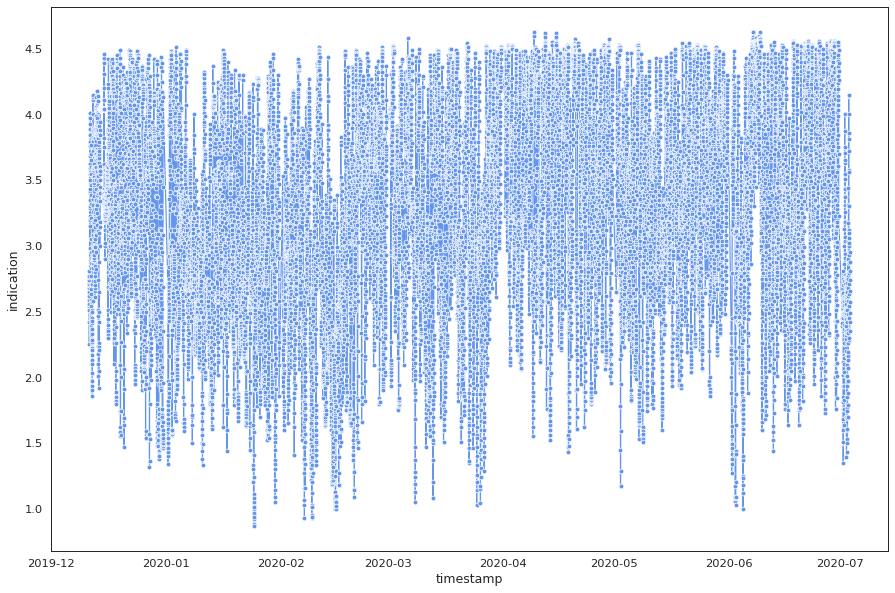

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

sns.lineplot(x=df.timestamp, y=df.indication, ax=ax, color='cornflowerblue', marker='o')

plt.show()

# **Προεπεξεργασία δεδομένων**
**Χρονολογική σειρά και ισοδύναμες χρονικές σφραγίδες**\
Τα δεδομένα πρέπει να είναι σε χρονολογική σειρά και οι χρονικές σημάνσεις πρέπει να είναι ισοδύναμες σε χρονοσειρές. Η χρονολογική σειρά μπορεί να επιτευχθεί ταξινομώντας το πλαίσιο δεδομένων με τις χρονικές σημάνσεις. Οι χρονικές σημάνσεις ισοδυνάμου υποδεικνύουν σταθερά χρονικά διαστήματα. 

Αυτό ισχύει ήδη στα δεδομένα μας: Το χρονικό διάστημα είναι ένας μήνας και τα δεδομένα είναι ήδη σε χρονολογική σειρά. 

In [32]:
# Sort values by timestamp (not necessary in this case)
df = df.sort_values(by='timestamp')

# Check time intervals
df['Time_Interval'] = df.timestamp - df.timestamp.shift(1)

df[['timestamp', 'Time_Interval']].head()

,timestamp,Time_Interval
0,2019-12-11 05:45:00,NaT
1,2019-12-11 06:00:00,0 days 00:15:00
2,2019-12-11 06:15:00,0 days 00:15:00
3,2019-12-11 06:30:00,0 days 00:15:00
4,2019-12-11 06:45:00,0 days 00:15:00


In [33]:
print(f"{df['Time_Interval'].value_counts()}")
df = df.drop('Time_Interval', axis=1)

0 days 00:15:00    19011
1 days 00:00:00        6
0 days 00:00:00        2
1 days 06:00:00        1
Name: Time_Interval, dtype: int64


# Χειρισμός Missing Values


Στην περίπτωση μας   έχουμε missing values



Επιλογή 1: Συμπλήρωσει το NaN με Outlier ή Zero

Επιλογή 2: Συμπλήρώσει NaN με μέση τιμή

Επιλογή 3: Συμπλήρωσει το NaN με την τελευταία τιμή με .ffill ()

Επιλογή 4: Συμπλήρωσει το NaN με τιμή γραμμικής παρεμβολής με .interpolate ()

Η συμπλήρωση NaN με τις παρεμβαλλόμενες τιμές είναι η καλύτερη επιλογή σε αυτό το μικρό παράδειγμα, αλλά απαιτεί γνώση των γειτονικών τιμών.

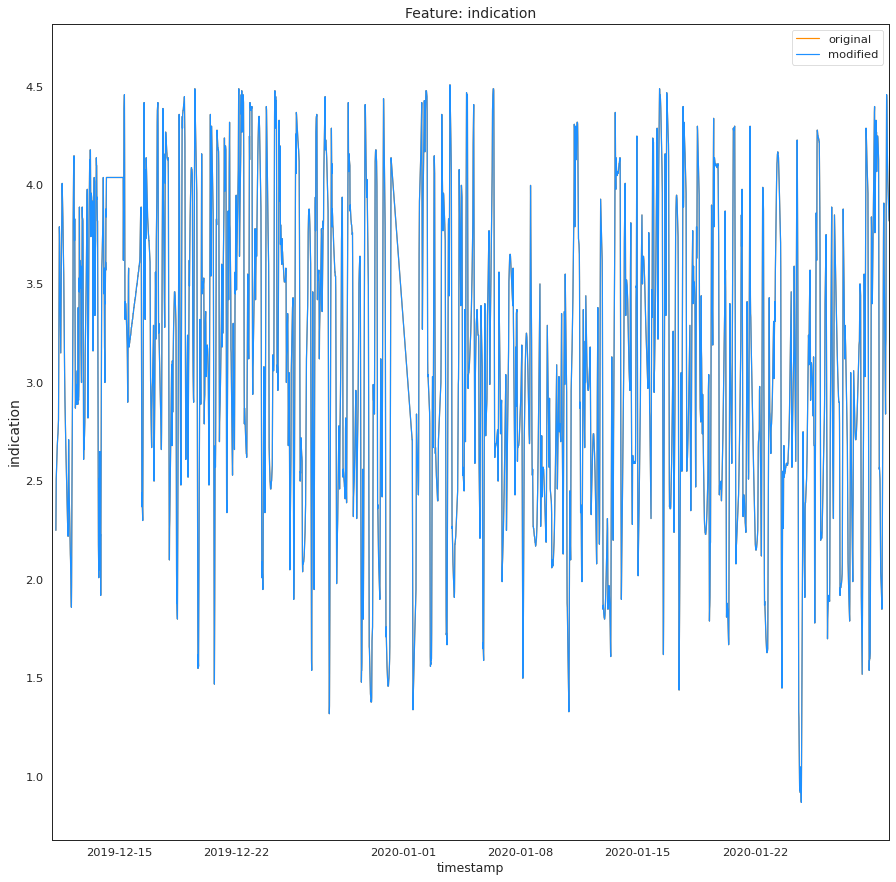

In [34]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
old = df.indication.copy()
df['indication'] = np.where((df.indication== 0),np.nan, df.indication)

sns.lineplot(x=df.timestamp, y=old.fillna(np.inf), ax=ax, color='darkorange', label = 'original')
sns.lineplot(x=df.timestamp, y=df.indication.fillna(np.inf), ax=ax, color='dodgerblue', label = 'modified')
ax.set_title('Feature: indication', fontsize=14)
ax.set_ylabel(ylabel='indication', fontsize=14)


ax.set_xlim([date(2019, 12, 11), date(2020, 1, 30)])
plt.show()

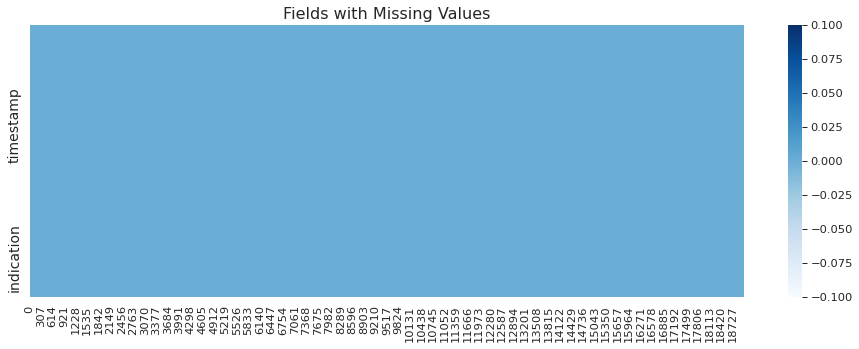

In [35]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
sns.heatmap(df.T.isna(), cmap='Blues')
ax.set_title('Fields with Missing Values', fontsize=16)
#for tick in ax.xaxis.get_major_ticks():
#    tick.label.set_fontsize(14) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

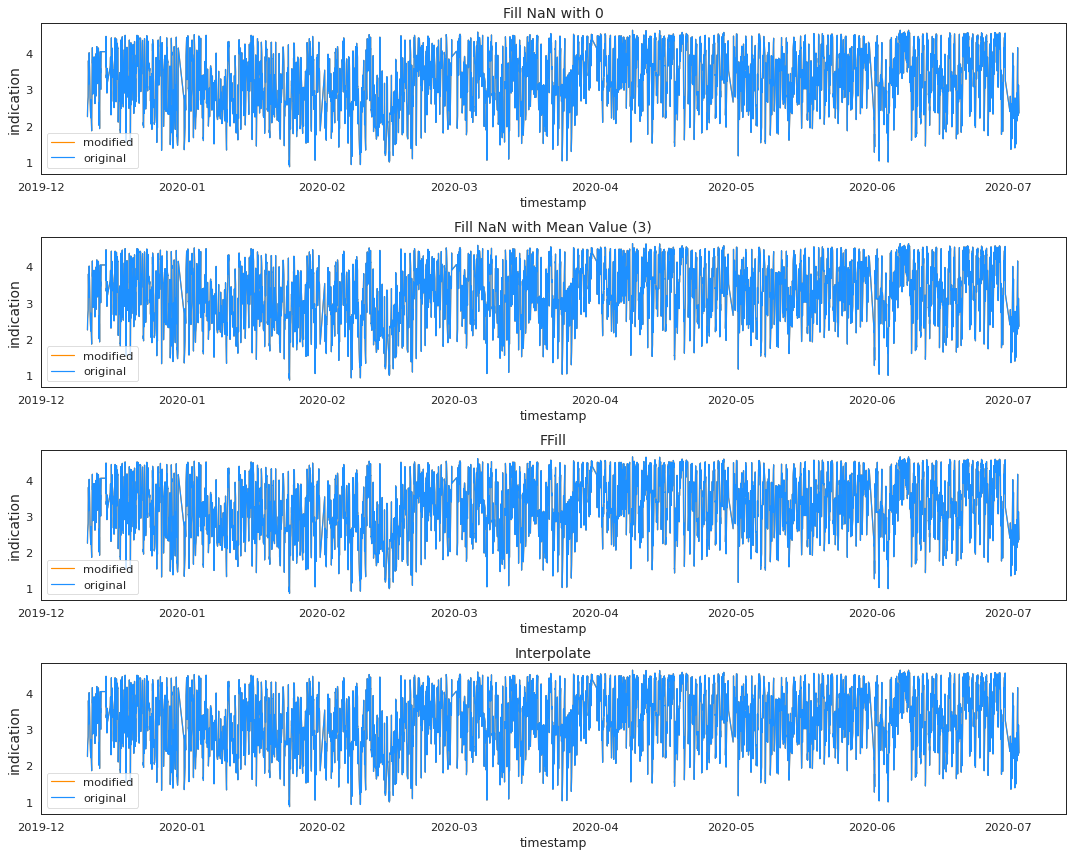

In [36]:
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))

sns.lineplot(x=df.timestamp, y=df.indication.fillna(0), ax=ax[0], color='darkorange', label = 'modified')
sns.lineplot(x=df.timestamp, y=df.indication.fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'original')
ax[0].set_title('Fill NaN with 0', fontsize=14)
ax[0].set_ylabel(ylabel='indication', fontsize=14)

mean_val = df.indication .mean()
sns.lineplot(x=df.timestamp, y=df.indication .fillna(mean_val), ax=ax[1], color='darkorange', label = 'modified')
sns.lineplot(x=df.timestamp, y=df.indication .fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'original')
ax[1].set_title(f'Fill NaN with Mean Value ({mean_val:.0f})', fontsize=14)
ax[1].set_ylabel(ylabel='indication', fontsize=14)

sns.lineplot(x=df.timestamp, y=df.indication .ffill(), ax=ax[2], color='darkorange', label = 'modified')
sns.lineplot(x=df.timestamp, y=df.indication .fillna(np.inf), ax=ax[2], color='dodgerblue', label = 'original')
ax[2].set_title(f'FFill', fontsize=14)
ax[2].set_ylabel(ylabel='indication', fontsize=14)

sns.lineplot(x=df.timestamp, y=df.indication .interpolate(), ax=ax[3], color='darkorange', label = 'modified')
sns.lineplot(x=df.timestamp, y=df.indication .fillna(np.inf), ax=ax[3], color='dodgerblue', label = 'original')
ax[3].set_title(f'Interpolate', fontsize=14)
ax[3].set_ylabel(ylabel='indication', fontsize=14)


plt.tight_layout()
plt.show()

# Δειγματοληψία

Η δειγματοληψία μπορεί να παρέχει πρόσθετες πληροφορίες σχετικά με τα δεδομένα. Υπάρχουν δύο τύποι δειγματοληψίας:

Η δειγματοληψία είναι όταν αυξάνεται η συχνότητα των δειγμάτων (π.χ. ημέρες σε ώρες)
Η δειγματοληψία είναι όταν η συχνότητα των δειγμάτων μειώνεται (π.χ. ημέρες σε εβδομάδες)
Στην περίπτωση μας  θα κάνουμε κάποια δειγματοληψία με τη συνάρτηση .resample ()

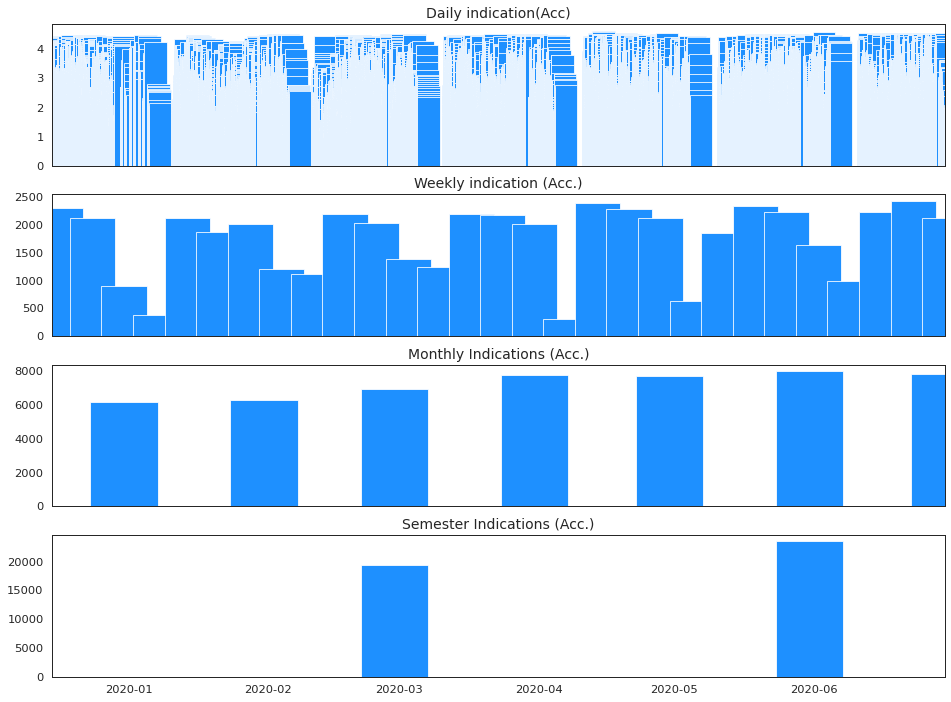

In [37]:
fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(16,12))

ax[0].bar(df.timestamp, df.indication, width=5, color='dodgerblue')
ax[0].set_title('Daily indication(Acc)', fontsize=14)

resampled_df = df[['timestamp','indication']].resample('7D', on='timestamp').sum().reset_index(drop=False)
ax[1].bar(resampled_df.timestamp, resampled_df.indication, width=10, color='dodgerblue')
ax[1].set_title('Weekly indication (Acc.)', fontsize=14)

resampled_df = df[['timestamp','indication']].resample('M', on='timestamp').sum().reset_index(drop=False)
ax[2].bar(resampled_df.timestamp, resampled_df.indication, width=15, color='dodgerblue')
ax[2].set_title('Monthly Indications (Acc.)', fontsize=14)

resampled_df = df[['timestamp','indication']].resample('3M', on='timestamp').sum().reset_index(drop=False)
ax[3].bar(resampled_df.timestamp, resampled_df.indication, width=15, color='dodgerblue')
ax[3].set_title('Semester Indications (Acc.)', fontsize=14)

#resampled_df = df[['timestamp','indication']].resample('12M', on='timestamp').sum().reset_index(drop=False)
#ax[4].bar(resampled_df.timestamp, resampled_df.indication, width=15, color='dodgerblue')
#ax[4].set_title('Anual Indications (Acc.)', fontsize=14)

for i in range(4):
    ax[i].set_xlim([date(2019, 12, 15), date(2020, 6, 30)])

plt.show()

Στην περίπτωση μας , η δειγματοληψία αφου ορίζουμε τις προβλέψεις μας εβδομαδιαίες, Λαμβάνοντας υπόψη τα εβδομαδιαία δεδομένα θα υποδειγματοποιήσουμε τα δεδομένα σε εβδομαδιαία βάση.

In [37]:
df_downsampled = df[['timestamp',
                     'indication', 
                     ]].resample('7D', on='timestamp').mean().reset_index(drop=False)


df = df_downsampled

#Stationarity


Ορισμένα μοντέλα χρονοσειρών, όπως το ARIMA, υποθέτουν ότι τα υποκείμενα δεδομένα είναι στάσιμα. Η σταθερότητα περιγράφει ότι η χρονολογική σειρά έχει σταθερή μέση τιμή και η μέση τιμή δεν εξαρτώνται από το χρόνο
σταθερή διακύμανση και η διακύμανση δεν εξαρτώνται από το χρόνο
συνεχής συνδιακύμανση και η συνδιακύμανση δεν εξαρτώνται από το χρόνο
Εάν μια χρονοσειρά έχει μια συγκεκριμένη (στάσιμη) συμπεριφορά σε ένα δεδομένο χρονικό διάστημα, τότε μπορεί να υποτεθεί ότι οι χρονοσειρές θα συμπεριφέρονται το ίδιο αργότερα.

Οι χρονοσειρές με τάση ή / και εποχικότητα δεν είναι σταθερές. Η τάση δείχνει ότι ο μέσος όρος δεν είναι σταθερός με την πάροδο του χρόνου και η εποχικότητα δείχνει ότι η διακύμανση δεν είναι σταθερή με την πάροδο του χρόνου.

Ο έλεγχος της σταθερότητας μπορεί να γίνει μέσω τριών διαφορετικών προσεγγίσεων:

*   οπτικά: Eλέγxoς για τάσεις ή εποχικότητα
*   βασικά στατιστικά στοιχεία: διαίρεση χρονοσειρών και σύγκριση του μέσου όρου και της διακύμανσης κάθε διαμερίσματος
*   στατιστική δοκιμή:  δοκιμή Dickey Fuller










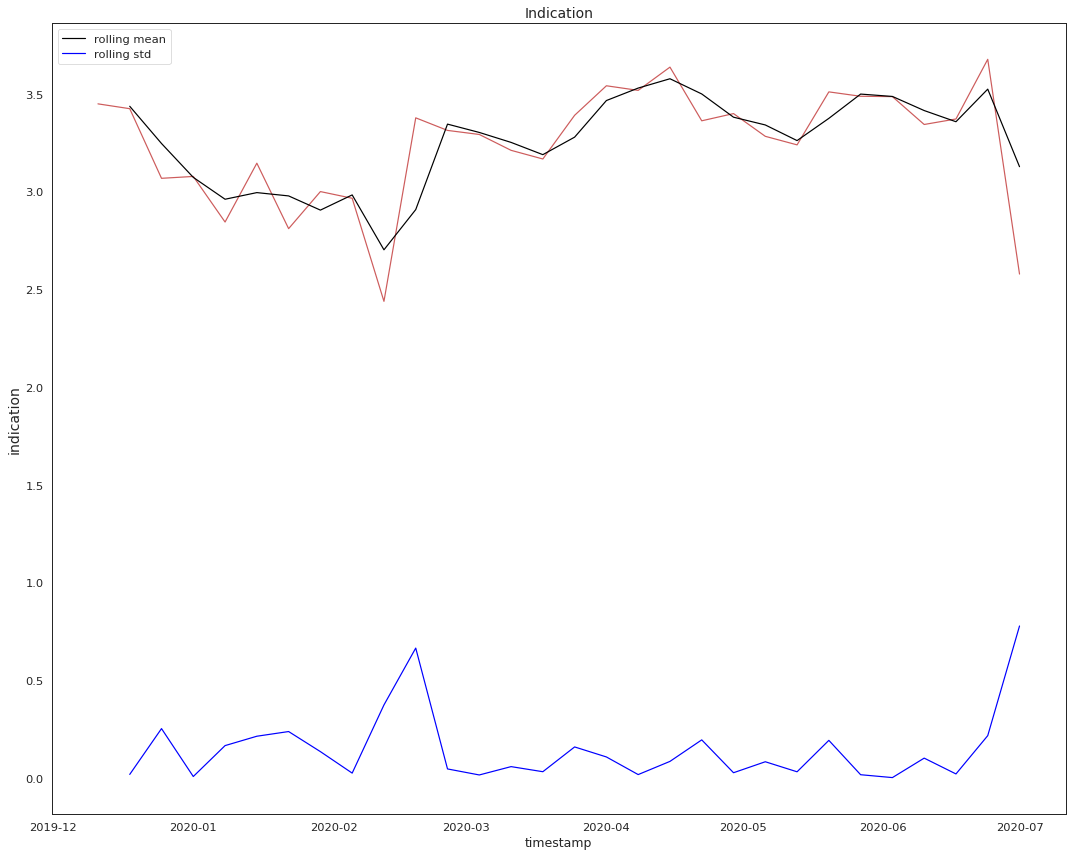

In [38]:
rolling_window = 2
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 12))

sns.lineplot(x=df.timestamp, y=df.indication, ax=ax, color='indianred')
sns.lineplot(x=df.timestamp, y=df.indication.rolling(rolling_window).mean(), ax=ax, color='black', label='rolling mean')
sns.lineplot(x=df.timestamp, y=df.indication.rolling(rolling_window).std(), ax=ax, color='blue', label='rolling std')
ax.set_title('Indication', fontsize=14)
ax.set_ylabel(ylabel='indication', fontsize=14)




plt.tight_layout()
plt.show()

Στη συνέχεια, θα ελέγξουμε τα υποκείμενα στατιστικά στοιχεία. Για αυτό θα χωρίσουμε τις χρονοσειρές σε δύο ενότητες και θα ελέγξουμε τη μέση τιμή και τη διακύμανση. 
Αυτό ονομάζεται αναπτυσσόμενο παράθυρο expanding window statistics και μπορεί να βοηθήσει στην παρακολούθηση των ορίων των παρατηρήσιμων δεδομένων.

In [39]:
num_partitions = 2
partition_length = int(len(df) / num_partitions)

partition1_mean = df.head(partition_length).mean()
partition1_var = df.head(partition_length).var()
partition2_mean = df.tail(partition_length).mean()
partition2_var = df.tail(partition_length).var()

In [40]:
stationarity_test = pd.concat([partition1_mean, partition2_mean, partition1_var, partition2_var], axis=1)
stationarity_test.columns = ['Partition 1 Mean', 'Partition 2 Mean', 'Partition 1 Variance', 'Partition 2 Variance']

def highlight_greater(x):
    temp = x.copy()
    temp = temp.round(0).astype(int)
    m1 = (temp['Partition 1 Mean'] == temp['Partition 2 Mean'])
    m2 = (temp['Partition 1 Variance'] == temp['Partition 2 Variance'])
    m3 = (temp['Partition 1 Mean'] < temp['Partition 2 Mean']+3) & (temp['Partition 1 Mean'] > temp['Partition 2 Mean']-3)
    m4 = (temp['Partition 1 Variance'] < temp['Partition 2 Variance']+3) & (temp['Partition 1 Variance'] > temp['Partition 2 Variance']-3)

    df2 = pd.DataFrame('background-color: ', index=x.index, columns=x.columns)
    #rewrite values by boolean masks
    df2['Partition 1 Mean'] = np.where(~m1, 'background-color: {}'.format('salmon'), df2['Partition 1 Mean'])
    df2['Partition 2 Mean'] = np.where(~m1, 'background-color: {}'.format('salmon'), df2['Partition 2 Mean'])
    df2['Partition 1 Mean'] = np.where(m3, 'background-color: {}'.format('gold'), df2['Partition 1 Mean'])
    df2['Partition 2 Mean'] = np.where(m3, 'background-color: {}'.format('gold'), df2['Partition 2 Mean'])
    df2['Partition 1 Mean'] = np.where(m1, 'background-color: {}'.format('mediumseagreen'), df2['Partition 1 Mean'])
    df2['Partition 2 Mean'] = np.where(m1, 'background-color: {}'.format('mediumseagreen'), df2['Partition 2 Mean'])

    df2['Partition 1 Variance'] = np.where(~m2, 'background-color: {}'.format('salmon'), df2['Partition 1 Variance'])
    df2['Partition 2 Variance'] = np.where(~m2, 'background-color: {}'.format('salmon'), df2['Partition 2 Variance'])
    df2['Partition 1 Variance'] = np.where(m4, 'background-color: {}'.format('gold'), df2['Partition 1 Variance'])
    df2['Partition 2 Variance'] = np.where(m4, 'background-color: {}'.format('gold'), df2['Partition 2 Variance'])
    df2['Partition 1 Variance'] = np.where(m2, 'background-color: {}'.format('mediumseagreen'), df2['Partition 1 Variance'])
    df2['Partition 2 Variance'] = np.where(m2, 'background-color: {}'.format('mediumseagreen'), df2['Partition 2 Variance'])

    return df2


stationarity_test.style.apply(highlight_greater, axis=None).format("{:20,.0f}")

,Partition 1 Mean,Partition 2 Mean,Partition 1 Variance,Partition 2 Variance
indication,3,3,0,0


 Δεδομένου ότι εξετάζουμε τη μέση τιμή και τη διακύμανση, αναμένουμε ότι τα δεδομένα συμμορφώνονται με μια κατανομή Gaussian (διανομή σε σχήμα καμπάνας) σε περίπτωση στάσης.

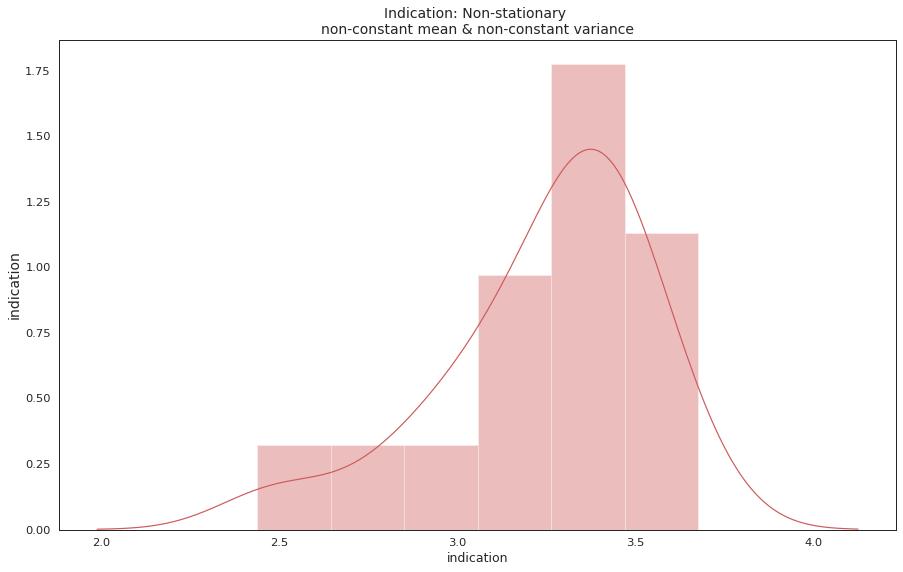

In [41]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 9))

sns.distplot(df.indication, ax=ax, color='indianred')
ax.set_title('Indication: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax.set_ylabel(ylabel='indication', fontsize=14)

plt.show()

Tο τεστ Augmented Dickey-Fuller (ADF) είναι ένας τύπος στατιστικού τεστ που ονομάζεται unit root test. Unit roots είναι αιτία για μη στασιμότητα.

Null Hypothesis (H0): Οι χρονοσειρές έχουν μια Unit root. (Οι χρονοσειρές δεν είναι σταθερές).

Εναλλακτική υπόθεση (H1): Οι χρονοσειρές δεν έχουν Unit root (Οι χρονοσειρές είναι στάσιμες).

Εάν η μηδενική υπόθεση μπορεί να απορριφθεί, μπορούμε να συμπεράνουμε ότι οι χρονοσειρές είναι σταθερές.

Υπάρχουν δύο τρόποι απόρριψης της μηδενικής υπόθεσης:

Αφενός, η μηδενική υπόθεση μπορεί να απορριφθεί εάν η τιμή p είναι κάτω από ένα καθορισμένο επίπεδο σημασίας. Το προεπιλεγμένο επίπεδο σημασίας είναι 5%

** p-value> επίπεδο σημασίας (προεπιλογή: 0,05) : Αποτυχία απόρριψης της μηδενικής υπόθεσης (H0), τα δεδομένα έχουν ρίζα μονάδας και είναι μη στάσιμα.
** p-value <= επίπεδο σημασίας (προεπιλογή: 0,05) : Απόρριψη της μηδενικής υπόθεσης (H0), τα δεδομένα δεν έχουν ρίζα μονάδας και είναι στάσιμα.
Από την άλλη πλευρά, η μηδενική υπόθεση μπορεί να απορριφθεί εάν το στατιστικό στοιχείο δοκιμής είναι μικρότερο από την κρίσιμη τιμή.

In [42]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.indication.values)
adf_stat = result[0]
p_val = result[1]
crit_val_1 = result[4]['1%']
crit_val_5 = result[4]['5%']
crit_val_10 = result[4]['10%']

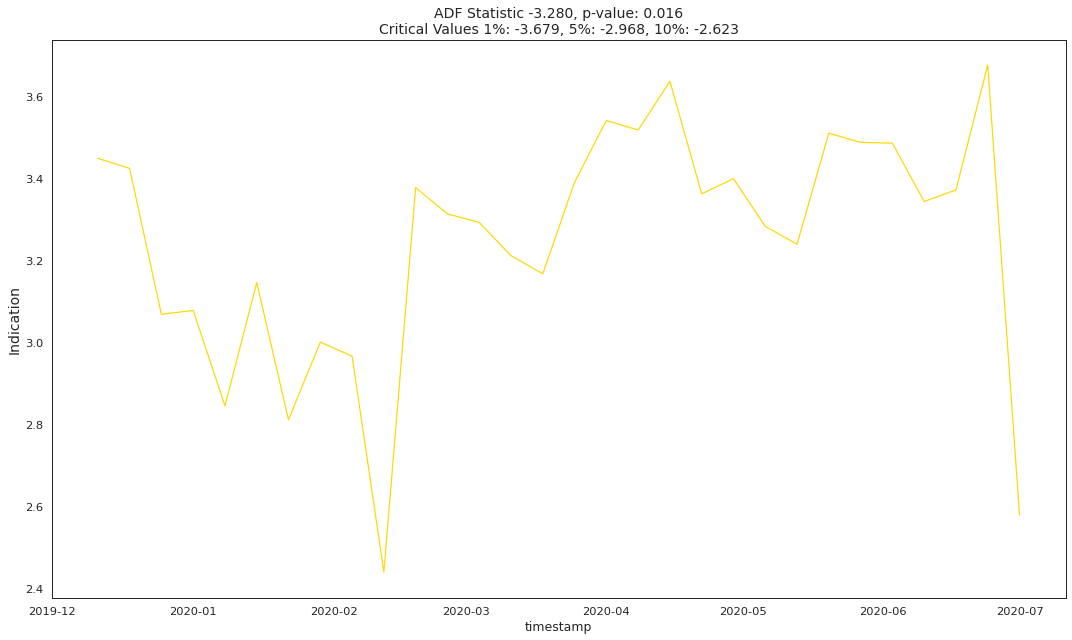

In [47]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 9))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'gold'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'orange'
    else:
        linecolor = 'indianred'
    sns.lineplot(x=df.timestamp, y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(df.indication.values, 'Indication', ax=ax)


plt.tight_layout()
plt.show()

Από τα παραπάνω αποτελέσματα, θα απορρίψουμε την μηδενική υπόθεση H0, τα δεδομένα δεν έχουν ρίζα μονάδας και είναι στάσιμα.

In [ ]:
Επειδή  τα δεδομένα  είναι στατικά αλλά μπορεί να μην ήταν  μπορούμε να χρησιμοποιήσουμε  τα δεδομένα που θέλουν μετατροπή. Ωστόσο, εάν τα δεδομένα δεν είναι στάσιμα αρχικά, θα πρέπει να επανεξετάσουμε την επιλογή του μοντέλου.

Οι δύο πιο κοινές μέθοδοι για την επίτευξη σταθερότητας είναι:

Μετασχηματισμός: π.χ. log ή τετραγωνική ρίζα για σταθεροποίηση μη σταθερής διακύμανσης

Διαφοροποίηση: αφαιρεί την τρέχουσα τιμή από την προηγούμενη

In [50]:
# Log Transform of absolute values
# (Log transoform of negative values will return NaN)
df['indication_log'] = np.log(abs(df.indication))
# list of values of 'Marks' column 
marks_list = df['indication_log'].tolist() 
  
# show the list 
print(marks_list)

[1.238217902529745, 1.231023262190836, 1.1211534426607415, 1.124256008167697, 1.0454479885659627, 1.1460646346994317, 1.0334598224910894, 1.0987682557073923, 1.087313578922477, 0.8914490010233496, 1.2172547432779957, 1.1980209852237045, 1.191728505052265, 1.1667761128866219, 1.1528815571946367, 1.2210980538514002, 1.264694262762425, 1.2580212284270635, 1.29128026842983, 1.2127555514138608, 1.22367857710008, 1.1888455696141673, 1.1754401272235857, 1.2558364717341506, 1.2494050219687898, 1.2488992213112833, 1.2071401455564041, 1.2155254287121593, 1.302214741482908, 0.9471465446384154]


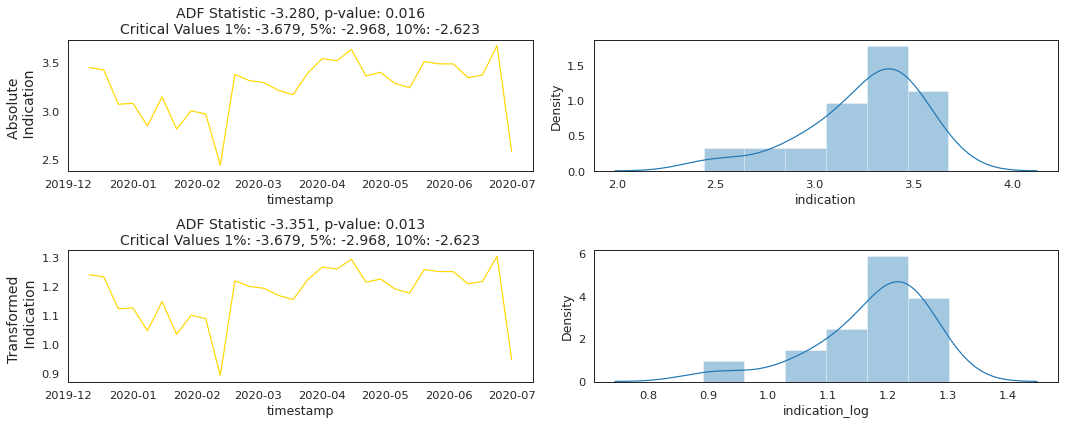

In [57]:
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))
visualize_adfuller_results((df.indication),'Absolute \n Indication', ax[0, 0])
sns.distplot(df.indication, ax=ax[0,1])

visualize_adfuller_results(df.indication_log, 'Transformed \n Indication', ax[1,0])
sns.distplot(df.indication_log, ax=ax[1,1])


plt.tight_layout()
plt.show()

Η διαφοροποίηση μπορεί να γίνει με 2 τρόπους

Διαφορά πρώτης τάξης: γραμμικές τάσεις με 𝑧𝑖 = 𝑦𝑖 − 𝑦𝑖 − 1

Διαφορά δεύτερης τάξης: τετραγωνικές τάσεις με

𝑧𝑖 = (𝑦𝑖 − 𝑦𝑖 − 1) - (𝑦𝑖-1 − 𝑦𝑖 −2)

In [58]:
# First Order Differencing
ts_diff = np.diff(df.indication)
df['indication_diff_1'] = np.append([0], ts_diff)

# Second Order Differencing
ts_diff = np.diff(df.indication_diff_1)
df['indication_diff_2'] = np.append([0], ts_diff)

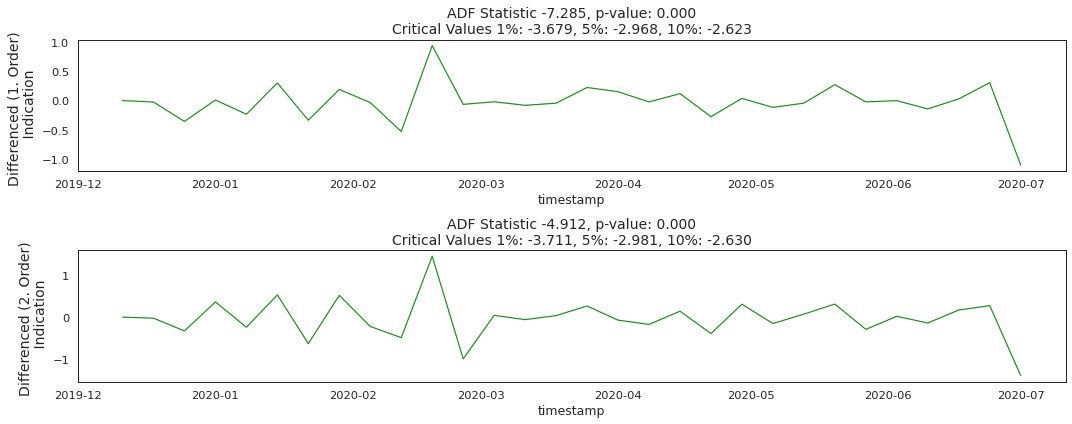

In [59]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 6))

visualize_adfuller_results(df.indication_diff_1, 'Differenced (1. Order) \n Indication', ax[0])
visualize_adfuller_results(df.indication_diff_2, 'Differenced (2. Order) \n Indication', ax[1])
plt.tight_layout()
plt.show()

Η διαφοροποίηση μπορεί να αντιστραφεί εάν είναι γνωστή η πρώτη τιμή πριν από τη αλλαγή. Σε αυτήν την περίπτωση, μπορούμε να συγκεντρώσουμε όλες τις τιμές με τη συνάρτηση .cumsum () και να προσθέσουμε την πρώτη τιμή των αρχικών χρονοσειρών.

In [60]:
df.indication.equals(df.indication_diff_1.cumsum() + df.indication.iloc[0])

True

# **Future Engineering**

Time Futures

In [62]:
df['year'] = pd.DatetimeIndex(df['timestamp']).year
df['month'] = pd.DatetimeIndex(df['timestamp']).month
df['day'] = pd.DatetimeIndex(df['timestamp']).day
df['day_of_year'] = pd.DatetimeIndex(df['timestamp']).dayofyear
df['week_of_year'] = pd.DatetimeIndex(df['timestamp']).weekofyear
df['quarter'] = pd.DatetimeIndex(df['timestamp']).quarter
df['season'] = df.month%12 // 3 + 1
df.sort_values('timestamp', inplace=True, ascending=True)
df = df.reset_index(drop=True)
df.head()

,timestamp,indication,indication_log,indication_diff_1,indication_diff_2,year,month,day,day_of_year,week_of_year,quarter,season
0,2019-12-11,3.449,1.238,0.000,0.000,2019,12,11,345,50,4,1
1,2019-12-18,3.425,1.231,-0.025,-0.025,2019,12,18,352,51,4,1
2,2019-12-25,3.068,1.121,-0.356,-0.332,2019,12,25,359,52,4,1
3,2020-01-01,3.078,1.124,0.010,0.366,2020,1,1,1,1,1,1
4,2020-01-08,2.845,1.045,-0.233,-0.243,2020,1,8,8,2,1,1


Encoding Cyclical Features

Τα  χαρακτηριστικά του χρόνου είναι και κυκλικά. Για παράδειγμα, το χαρακτηριστικό μήνας κυμαίνεται μεταξύ 1 και 12 για κάθε έτος. Ενώ η διαφορά μεταξύ κάθε μήνα αυξάνεται κατά 1 κατά τη διάρκεια του έτους, μεταξύ δύο ετών το χαρακτηριστικό του μήνα αυξάνεται από 12 (Δεκέμβριος) σε 1 (Ιανουάριος). Αυτό έχει ως αποτέλεσμα τη διαφορά -11, η οποία μπορεί να προκαλέσει σύγχυση σε πολλά μοντέλα.

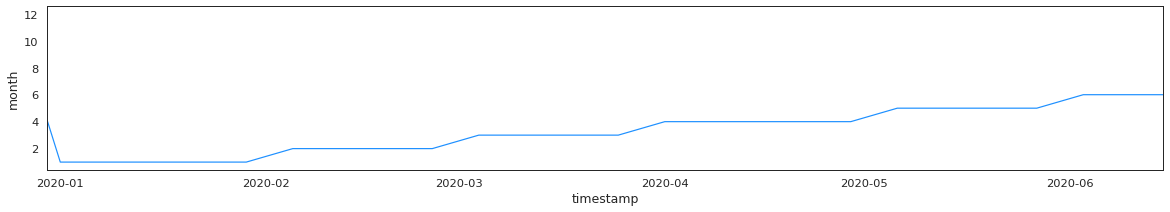

In [65]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))

sns.lineplot(x=df.timestamp, y=df.month, color='dodgerblue')
ax.set_xlim([date(2019, 12, 30), date(2020, 6, 15)])
plt.show()

Στην ιδανική περίπτωση, θέλουμε τα υποκείμενα δεδομένα να αντιπροσωπεύουν την ίδια διαφορά μεταξύ δύο διαδοχικών μηνών, ακόμη και μεταξύ Δεκεμβρίου και Ιανουαρίου. Μια κοινή λύση για αυτό το ζήτημα είναι η κωδικοποίηση κυκλικών χαρακτηριστικών σε δύο διαστάσεις με μετασχηματισμό ημιτονου και συνημιτόνου

In [66]:
month_in_year = 12
df['month_sin'] = np.sin(2*np.pi*df.month/month_in_year)
df['month_cos'] = np.cos(2*np.pi*df.month/month_in_year)

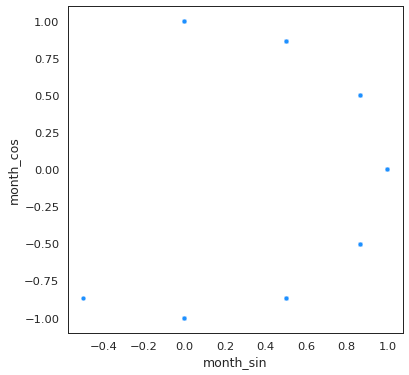

In [67]:
days_in_month = 30
df['day_sin'] = np.sin(2*np.pi*df.day/days_in_month)
df['day_cos'] = np.cos(2*np.pi*df.day/days_in_month)

days_in_year = 365
df['day_of_year_sin'] = np.sin(2*np.pi*df.day_of_year/days_in_year)
df['day_of_year_cos'] = np.cos(2*np.pi*df.day_of_year/days_in_year)

weeks_in_year = 52.1429
df['week_of_year_sin'] = np.sin(2*np.pi*df.week_of_year/weeks_in_year)
df['week_of_year_cos'] = np.cos(2*np.pi*df.week_of_year/weeks_in_year)

quarters_in_year = 4
df['quarter_sin'] = np.sin(2*np.pi*df.quarter/quarters_in_year)
df['quarter_cos'] = np.cos(2*np.pi*df.quarter/quarters_in_year)

seasons_in_year = 4
df['season_sin'] = np.sin(2*np.pi*df.season/seasons_in_year)
df['season_cos'] = np.cos(2*np.pi*df.season/seasons_in_year)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.scatterplot(x=df.month_sin, y=df.month_cos, color='dodgerblue')
plt.show()

# Αποσύνθεση(Decomposition)

Τα χαρακτηριστικά μιας χρονοσειράς όπως προαναφέραμε είναι

*   Τάση 
*   Επίπεδο
*   Εποχικότητα
*   Τυχαιότητα / θόρυβος

Μπορούμε να χρησιμοποιήσουμε τη συνάρτηση seasonal_decompose () από τη βιβλιοθήκη statsmodels.

Πρόσθετο: 𝑦 (𝑡) = 𝐿𝑒𝑣𝑒𝑙 + 𝑇𝑟𝑒𝑛𝑑 + 𝑆𝑒𝑎𝑠𝑜𝑛𝑎𝑙𝑖𝑡𝑦 + 𝑁𝑜𝑖𝑠𝑒
Πολλαπλασιαστικό: 𝑦 (𝑡) = 𝐿𝑒𝑣𝑒𝑙 ∗ 𝑇𝑟𝑒𝑛𝑑 ∗ 𝑆𝑒𝑎𝑠𝑜𝑛𝑎𝑙𝑖𝑡𝑦 ∗ 𝑁𝑜𝑖𝑠𝑒

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_cols =  ['indication']

for col in decompose_cols:
    decomp = seasonal_decompose(df[col], freq=12, model='additive', extrapolate_trend='freq')
    df[f"{col}_trend"] = decomp.trend
    df[f"{col}_seasonal"] = decomp.seasonal

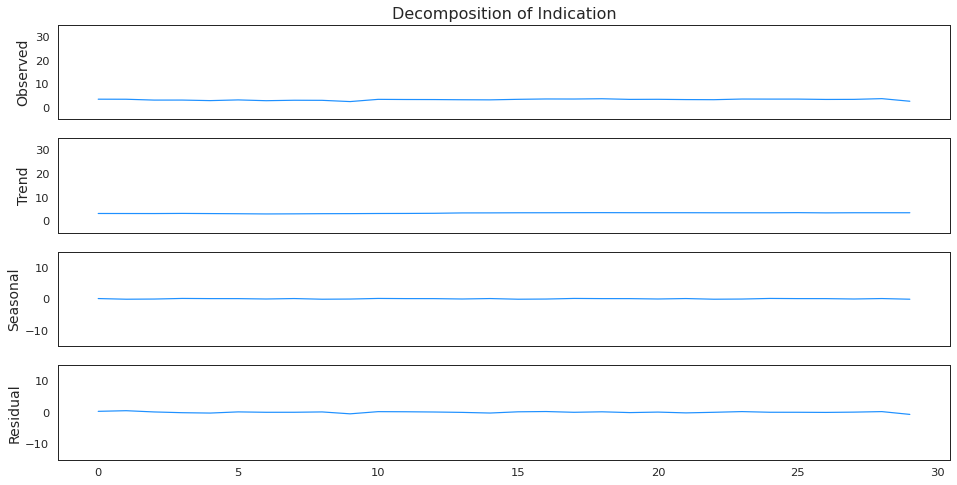

In [70]:
fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(16,8))
res = seasonal_decompose(df.indication, freq=7, model='additive', extrapolate_trend='freq')

ax[0].set_title('Decomposition of Indication', fontsize=16)
res.observed.plot(ax=ax[0], legend=False, color='dodgerblue')
ax[0].set_ylabel('Observed', fontsize=14)
ax[0].set_ylim([-5, 35])

res.trend.plot(ax=ax[1], legend=False, color='dodgerblue')
ax[1].set_ylabel('Trend', fontsize=14)
ax[1].set_ylim([-5, 35])

res.seasonal.plot(ax=ax[2], legend=False, color='dodgerblue')
ax[2].set_ylabel('Seasonal', fontsize=14)
ax[2].set_ylim([-15, 15])

res.resid.plot(ax=ax[3], legend=False, color='dodgerblue')
ax[3].set_ylabel('Residual', fontsize=14)
ax[3].set_ylim([-15, 15])


plt.show()

In [73]:
df[['indication', 'indication_trend', 'indication_seasonal']].head()\
.style.set_properties(subset=[ 'indication_trend', 'indication_seasonal'], **{'background-color': 'dodgerblue'})

,indication,indication_trend,indication_seasonal
0,3.449461,2.801799,0.249168
1,3.424732,2.835901,0.177074
2,3.068391,2.870004,-0.034762
3,3.077926,2.904106,0.014884
4,2.844673,2.938209,0.059778


# Καθυστέρηση(Lag)

Η μοντελοποίηση χρονοσειρών προϋποθέτει μια σχέση μεταξύ μιας παρατήρησης και της προηγούμενης παρατήρησης.
 Προηγούμενες παρατηρήσεις σε μια χρονοσειρά ονομάζονται καθυστερήσεις, με την παρατήρηση στο προηγούμενο χρονικό βήμα να λέγεται lag = 1, η παρατήρηση σε δύο χρονικά βήματα πριν = 2, και ούτω καθεξής. 
 Ένας χρήσιμος τύπος πλοκής για να εξερευνήσετε τη σχέση μεταξύ κάθε παρατήρησης και καθυστέρησης αυτής της παρατήρησης ονομάζεται διάγραμμα σκέδασης. Το Pandas έχει μια ενσωματωμένη συνάρτηση για ακριβώς αυτό που λέγεται καθυστέρηση. Σχεδιάζει την παρατήρηση τη στιγμή t στον άξονα x και την παρατήρηση lag = 1 (t-1) στον άξονα y.

Εάν τα σημεία συσσωρεύονται κατά μήκος μιας διαγώνιας γραμμής από κάτω αριστερά έως πάνω δεξιά από την πλοκή, υποδηλώνει μια θετική σχέση συσχέτισης.
Εάν τα σημεία συμπλέκονται κατά μήκος μιας διαγώνιας γραμμής από πάνω-αριστερά προς τα κάτω-δεξιά, υποδηλώνει μια αρνητική σχέση συσχέτισης.
Και οι δύο σχέσεις είναι καλές καθώς μπορούν να μοντελοποιηθούν.
Περισσότερα σημεία πιο σφιχτά προς τη διαγώνια γραμμή υποδηλώνουν μια ισχυρότερη σχέση και η μεγαλύτερη διάδοση από τη γραμμή υποδηλώνει μια πιο αδύναμη σχέση. Μια μπάλα στη μέση ή ένα άνοιγμα σε όλη την πλοκή υποδηλώνει μια αδύναμη ή καθόλου σχέση.

In [76]:
weeks_in_month = 4

df['indication_seasonal_shift_r_2M'] = df.indication_seasonal.shift(-2*weeks_in_month)
df['indication_seasonal_shift_r_1M'] = df.indication_seasonal.shift(-1*weeks_in_month)
df['indication_seasonal_shift_1M'] = df.indication_seasonal.shift(1*weeks_in_month)
df['indication_seasonal_shift_2M'] = df.indication_seasonal.shift(2*weeks_in_month)
df['indication_seasonal_shift_3M'] = df.indication_seasonal.shift(3*weeks_in_month)


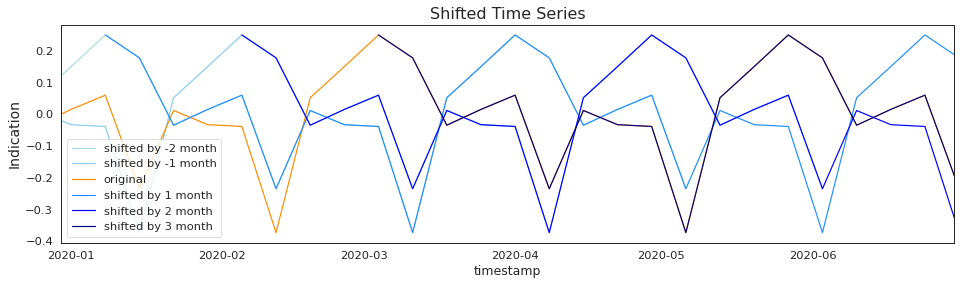

In [78]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,4))
sns.lineplot(x=df.timestamp, y=df.indication_seasonal_shift_r_2M, label='shifted by -2 month', ax=ax, color='lightblue')
sns.lineplot(x=df.timestamp, y=df.indication_seasonal_shift_r_1M, label='shifted by -1 month', ax=ax, color='skyblue')

sns.lineplot(x=df.timestamp, y=df.indication_seasonal, label='original', ax=ax, color='darkorange')

sns.lineplot(x=df.timestamp, y=df.indication_seasonal_shift_1M, label='shifted by 1 month', ax=ax, color='dodgerblue')
sns.lineplot(x=df.timestamp, y=df.indication_seasonal_shift_2M, label='shifted by 2 month', ax=ax, color='blue')
sns.lineplot(x=df.timestamp, y=df.indication_seasonal_shift_3M, label='shifted by 3 month', ax=ax, color='navy')

ax.set_title('Shifted Time Series', fontsize=16)

ax.set_xlim([date(2019, 12, 30), date(2020, 6, 30)])
ax.set_ylabel(ylabel='Indication', fontsize=14)

plt.show()

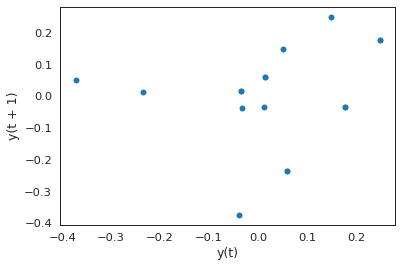

In [79]:
lag_plot(df['indication_seasonal'])

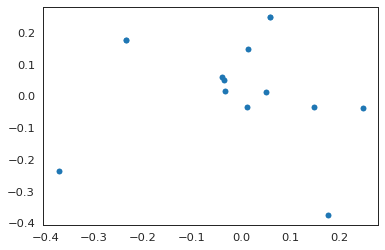

In [80]:
  
plt.scatter(x=df['indication_seasonal'].values,y=df['indication_seasonal_shift_1M'].values)


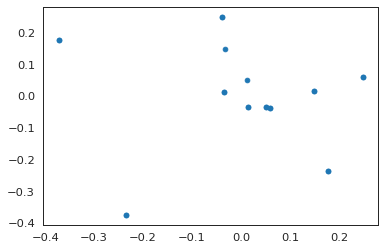

In [81]:
plt.scatter(x=df['indication_seasonal'].values,y=df['indication_seasonal_shift_2M'].values)


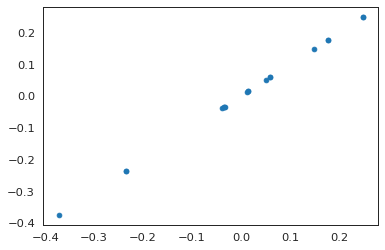

In [82]:
plt.scatter(x=df['indication_seasonal'].values,y=df['indication_seasonal_shift_3M'].values)

# Διερευνητική ανάλυση Δεδομένων (EDA)

Παρακάτω κανουμε απεικόνιση τα εποχιακά στοιχεία κάθε δυνατότητας συγκρίνοντας τα ελάχιστα και τα μέγιστα. Κάνοντας αυτό, μπορούμε ήδη να αποκτήσουμε κάποιες πληροφορίες:

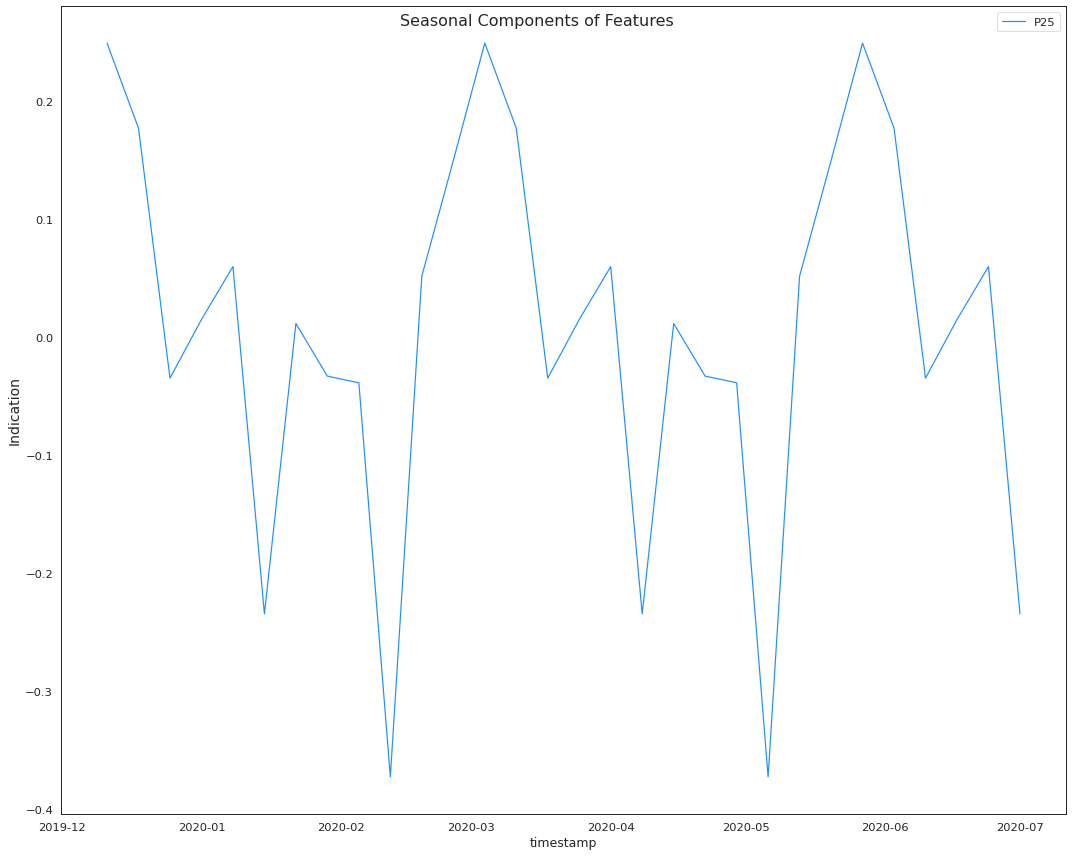

In [84]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 12))
f.suptitle('Seasonal Components of Features', fontsize=16)
sns.lineplot(x=df.timestamp, y=df.indication_seasonal,ax=ax,  color='dodgerblue', label='P25')
ax.set_ylabel(ylabel='Indication', fontsize=14)

plt.tight_layout()
plt.show()

In [54]:
#Προσδιορισμός κυλιόμενων στατιστικών στις αρχικές τιμές μετρήσεων
rolmean = df1.rolling(window=28).mean() #το μέγεθος παραθύρου 28 δηλώνει 28 εβδομάδες, δίνοντας κυλιόμενο μέσο στο δείγμα μας
rolstd = df1.rolling(window=28).std()
print(rolmean,rolstd)


                     indication
timestamp                      
2019-11-12 05:45:00         nan
2019-11-12 06:00:00         nan
2019-11-12 06:15:00         nan
2019-11-12 06:30:00         nan
2019-11-12 06:45:00         nan
...                         ...
2020-03-07 11:30:00       3.008
2020-03-07 11:45:00       2.956
2020-03-07 12:00:00       2.898
2020-03-07 12:15:00       2.836
2020-03-07 12:30:00       2.784

[19021 rows x 1 columns]                      indication
timestamp                      
2019-11-12 05:45:00         nan
2019-11-12 06:00:00         nan
2019-11-12 06:15:00         nan
2019-11-12 06:30:00         nan
2019-11-12 06:45:00         nan
...                         ...
2020-03-07 11:30:00       0.509
2020-03-07 11:45:00       0.477
2020-03-07 12:00:00       0.424
2020-03-07 12:15:00       0.355
2020-03-07 12:30:00       0.311

[19021 rows x 1 columns]


# Ανάλυση Αυτοσυσχέτισης

Αυτό το βήμα EDA είναι ιδιαίτερα σημαντικό όταν χρησιμοποιείτε το ARIMA. Η ανάλυση αυτοσυσχέτισης βοηθά στον προσδιορισμό των παραμέτρων AR και MA για το μοντέλο ARIMA.

Λειτουργία αυτοσυσχέτισης (ACF) και λειτουργία μερικής αυτοσυσχέτισης (PACF)

Λειτουργία αυτόματης συσχέτισης (ACF): Συσχέτιση μεταξύ χρονοσειρών με μια καθυστερημένη έκδοση. Η συνάρτηση αυτοσυσχέτισης ξεκινά μια υστέρηση 0, η οποία είναι η συσχέτιση των χρονοσειρών με τον εαυτό της και συνεπώς οδηγεί σε συσχέτιση 1 -> Η παράμετρος MA είναι q σημαντικής καθυστέρησεις.

Λειτουργία μερικής αυτοσυσχέτισης (PACF): Πρόσθετος συσχετισμός που εξηγείται από κάθε διαδοχικό όρο καθυστέρησης -> Η παράμετρος AR είναι p σημαντικής καθυστέρησης
Η αυτόματη συσχέτιση βοηθά στον εντοπισμό της εποχικότητας.


Όπως μπορούμε να συμπεράνουμε από το παραπάνω γράφημα, η αυτοσυσχέτιση παραμένει σταθερή  καθώς η καθυστέρηση αυξάνεται, επιβεβαιώνοντας ότι  υπάρχει γραμμική σχέση μεταξύ των παρατηρήσεων που διαχωρίζονται από μεγαλύτερες καθυστερήσεις.
Για τη διαδικασία AR, αναμένουμε ότι το διάγραμμα ACF θα μειωθεί σταδιακά και ταυτόχρονα το PACF θα πρέπει να έχει απότομη πτώση μετά από σημαντικές καθυστερήσεις. Για να ορίσουμε μια διαδικασία MA, περιμένουμε το αντίθετο από τα γραφήματα ACF και PACF, που σημαίνει ότι: το ACF θα πρέπει να εμφανίζει απότομη πτώση μετά από ένα ορισμένο αριθμό καθυστερήσεων q ενώ το PACF θα πρέπει να δείχνει μια γεωμετρική ή σταδιακή φθίνουσα τάση.


Μπορούμε να ποσοτικοποιήσουμε τη δύναμη και τον τύπο της σχέσης μεταξύ των παρατηρήσεων και των καθυστερήσεών τους. Στα στατιστικά, αυτό ονομάζεται συσχέτιση και όταν υπολογίζεται με βάση τις τιμές υστέρησης στις χρονοσειρές, ονομάζεται αυτοσυσχέτιση (αυτοσυσχέτιση). Μια τιμή συσχέτισης που υπολογίζεται μεταξύ δύο ομάδων αριθμών, όπως παρατηρήσεις και οι τιμές lag = 1, οδηγεί σε έναν αριθμό μεταξύ -1 και 1. Το σύμβολο αυτού του αριθμού δείχνει μια αρνητική ή θετική συσχέτιση αντίστοιχα. Μια τιμή κοντά στο μηδέν υποδηλώνει ασθενή συσχέτιση, ενώ μια τιμή πλησιέστερη στο -1 ή 1 υποδηλώνει ισχυρή συσχέτιση.

Οι τιμές συσχέτισης, που ονομάζονται συντελεστές συσχέτισης, μπορούν να υπολογιστούν για κάθε παρατήρηση και διαφορετικές τιμές υστέρησης. Μόλις υπολογιστεί, ένα γράφημα μπορεί να δημιουργηθεί για να κατανοήσει καλύτερα πώς αλλάζει αυτή η σχέση με την καθυστέρηση. Αυτός ο τύπος σχεδίου ονομάζεται αυτοσυσχέτιση.

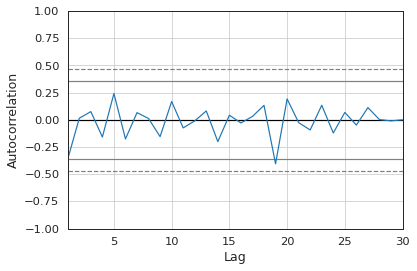

In [86]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.indication_diff_1)
plt.show()

Από το γράφημα ACF, βλέπουμε ότι η καμπύλη αγγίζει τη γραμμή y = 0,0 στο x = 1. Έτσι, από τη θεωρία, Q = 1 Από το γράφημα PACF, βλέπουμε ότι η καμπύλη αγγίζει τη γραμμή y = 0,0 στο x = 1. Έτσι, από θεωρία, P = 1

Το ARIMA είναι AR + I + MA. Προηγουμένως, βλέπουμε ένα μοντέλο ARIMA, ας δούμε τα αποτελέσματα του μεμονωμένου μοντέλου AR & MA. Σημειώστε ότι, αυτά τα μοντέλα θα δώσουν μια τιμή RSS. Οι χαμηλότερες τιμές RSS υποδεικνύουν ένα καλύτερο μοντέλο.

Μπορούμε να δούμε κάποιο ημιτονοειδές σχήμα και στις 2 λειτουργίες ACF και PACF. Αυτό υποδηλώνει ότι  υπάρχουν οι δύο διαδικασίες AR και MA.

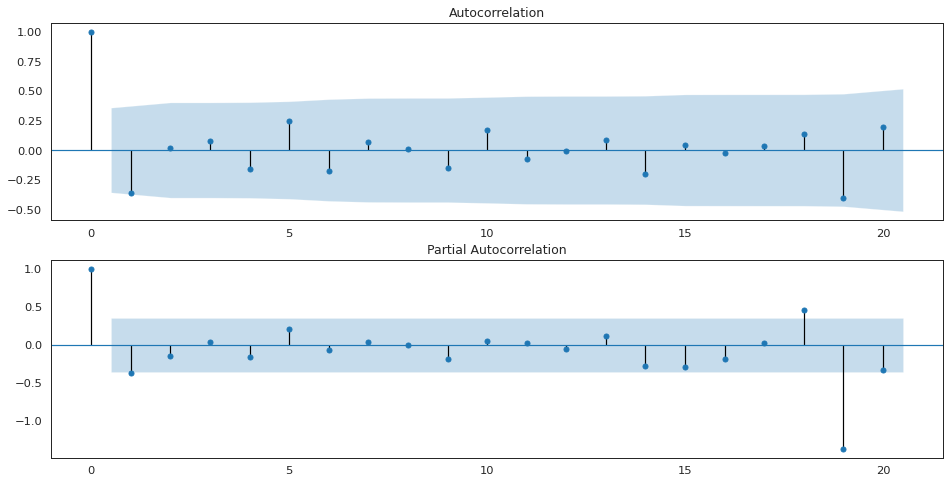

In [93]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df.indication_diff_1,lags=20, ax=ax[0])
plot_pacf(df.indication_diff_1,lags=20, ax=ax[1])
plt.show()

# Cross Validation

Για cross validation ,  χρησιμοποιήσετε η βιβλιοθήκη Split Time Series Στην πρόβλεψη χρονοσειρών

In [97]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3

X = df.timestamp
y = df.indication

folds = TimeSeriesSplit(n_splits=N_SPLITS)

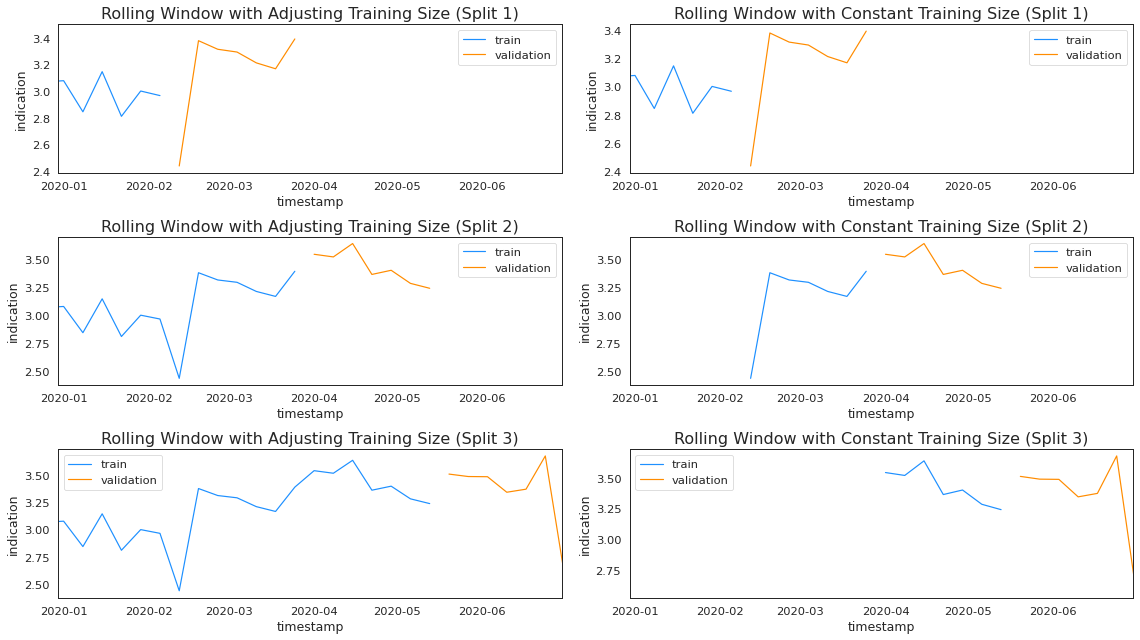

In [98]:
f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))

for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    sns.lineplot(x= X_train, y= y_train, ax=ax[i,0], color='dodgerblue', label='train')
    sns.lineplot(x= X_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
                 y= y_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
                 ax=ax[i,1], color='dodgerblue', label='train')

    for j in range(2):
        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color='darkorange', label='validation')
    ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fontsize=16)

for i in range(N_SPLITS):
    ax[i, 0].set_xlim([date(2019, 12, 30), date(2020, 6, 30)])
    ax[i, 1].set_xlim([date(2019, 12, 30), date(2020, 6, 30)])
plt.tight_layout()
plt.show()

# Μοντέλα

Οι χρονοσειρές μπορούν να είναι είτε univariate είτε multivariate:

Οι χρονοσειρές Univariate έχουν μόνο μία μεταβλητή που εξαρτάται από το χρόνο.
Οι χρονοσειρές multivariate έχουν πολλαπλές μεταβλητή που εξαρτώνται από το χρόνο.
Το παράδειγμά μας είναι αρχικά είναι μια σειρά μίας μεταβλήτής τη μεταβλητή στόχου indication

Θα επικεντρωθούμε σε εβδομαδιαίες προβλέψεις. Θα χρησιμοποιήσουμε το Q2 2020 ως δεδομένα δοκιμής και τα υπόλοιπα δεδομένα θα διαιρεθούν εβδομαδιαια για διασταυρούμενη επικύρωση.

Θα αξιολογήσουμε το μέσο απόλυτο σφάλμα (MAE) και το Root Mean Square Error (RMSE) των μοντέλων. Για τις μετρήσεις είναι καλύτερες όσο μικρότερες είναι.

# Μοντέλα για Univariate Time Series

Stochastic Models

*   Naive Approach
*   Moving Average
*   Exponential Smoothing
*   ARIMA


Deep Learning

*   Prophet
*   LSTM








In [192]:
df['month_idx'] = (df.month != df.month.shift(1)).cumsum()

target = 'indication'
features = [feature for feature in df.columns if feature != target]

N_SPLITS =6


X = df[df.month_idx < N_SPLITS][features]
y = df[df.month_idx < N_SPLITS][target]

X_test = df[df.month_idx == N_SPLITS][features].reset_index(drop=True)
y_test = df[df.month_idx == N_SPLITS][target].reset_index(drop=True)

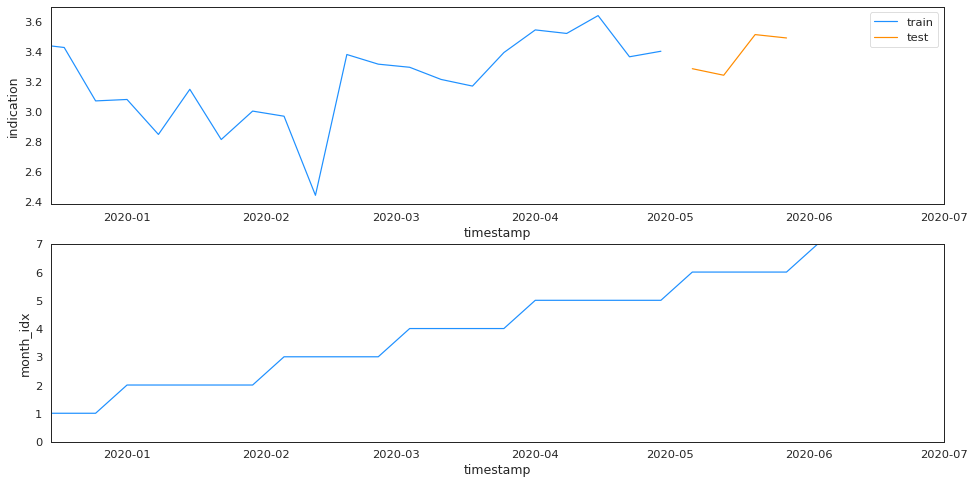

In [181]:
folds = np.linspace(0, N_SPLITS-3, num=N_SPLITS-2)

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

sns.lineplot(x=X.timestamp, y=y, ax=ax[0], color='dodgerblue', label='train')
sns.lineplot(x=X_test.timestamp, y=y_test, ax=ax[0], color='darkorange', label='test')

sns.lineplot(x=df.timestamp, y=df.month_idx, ax=ax[1], color='dodgerblue')
ax[0].set_xlim([date(2019, 12, 15), date(2020, 7, 1)])
ax[1].set_xlim([date(2019, 12, 15), date(2020, 7, 1)])
ax[1].set_ylim([0, N_SPLITS+1])

plt.show()

# Naive Approach


𝑦̂ 𝑡+1=𝑦𝑡

In [185]:
def plot_approach_evaluation(y_pred, score_mae, score_rsme, approach_name):
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
    f.suptitle(approach_name, fontsize=16)
    sns.lineplot(x=X.timestamp, y=y, ax=ax[0], color='dodgerblue', label='Training', linewidth=2)
    sns.lineplot(x=X_test.timestamp, y=y_test, ax=ax[0], color='gold', label='Ground Truth', linewidth=2) #navajowhite
    sns.lineplot(x=X_test.timestamp, y=y_pred, ax=ax[0], color='darkorange', label='Predicted', linewidth=2)
    ax[0].set_xlim([date(2019, 12, 15), date(2020, 7, 1)])
    ax[0].set_ylim([0, 8])
    ax[0].set_title(f'Prediction \n MAE: {mean_absolute_error(y_test, y_pred):.2f}, RSME: {math.sqrt(mean_squared_error(y_valid, y_valid_pred)):.2f}', fontsize=14)
    ax[0].set_xlabel(xlabel='Date', fontsize=14)
    ax[0].set_ylabel(ylabel='Indication', fontsize=14)

    sns.lineplot(x=folds, y=score_mae,  color='gold', label='MAE', ax=ax[1])
    sns.lineplot(x=folds, y=score_rsme, color='indianred', label='RSME', ax=ax[1])
    ax[1].set_title('Loss', fontsize=14)
    ax[1].set_xlabel(xlabel='Fold', fontsize=14)
    ax[1].set_ylabel(ylabel='Loss', fontsize=14)
    ax[1].set_ylim([-1, 1])   
    plt.show()

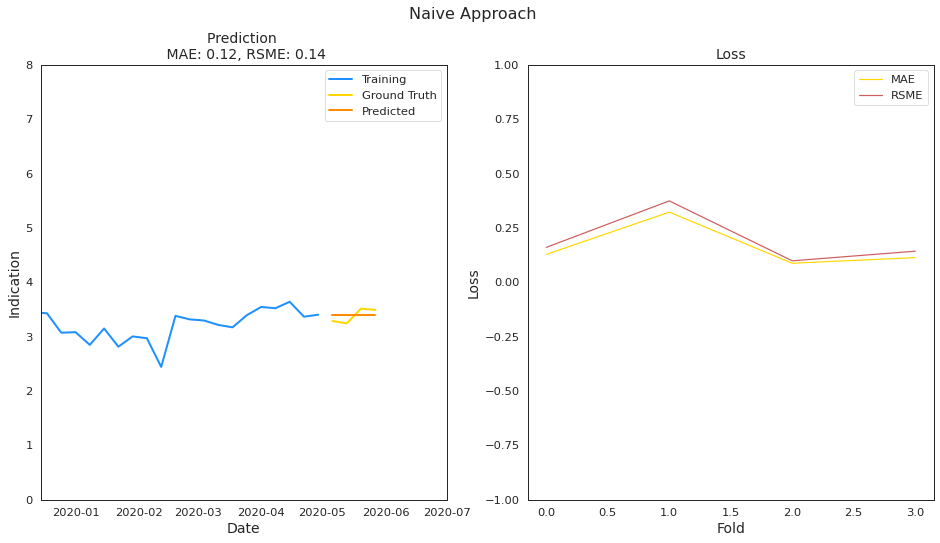

In [186]:
score_mae = []
score_rsme = []
for fold, valid_month_id in enumerate(range(2, N_SPLITS)):
    # Get indices for this fold
    train_index = df[df.month_idx < valid_month_id].index
    valid_index = df[df.month_idx == valid_month_id].index

    # Prepare training and validation data for this fold
    #X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    # Initialize y_valid_pred
    y_valid_pred = pd.Series(np.ones(len(y_valid)))
    
    # Prediction: Naive approach
    y_valid_pred = y_valid_pred * y_train.iloc[-1]
    
    # Calcuate metrics
    score_mae.append(mean_absolute_error(y_valid, y_valid_pred))
    score_rsme.append(math.sqrt(mean_squared_error(y_valid, y_valid_pred)))

y_pred = pd.Series(np.ones(len(X_test))) * y.iloc[-1]

plot_approach_evaluation(y_pred, score_mae, score_rsme, 'Naive Approach')

# Moving Average

Moving Average είναι μια naive και αποτελεσματική τεχνική στην πρόβλεψη χρονολογικών σειρών. Μπορεί να χρησιμοποιηθεί για την προετοιμασία δεδομένων, τη σχεδίαση χαρακτηριστικών, ακόμη και άμεσα για την πραγματοποίηση προβλέψεων. Η εξομάλυνση είναι μια τεχνική που εφαρμόζεται στις χρονοσειρές για την αφαίρεση της λεπτής διακύμανσης μεταξύ των χρονικών βημάτων. Η ελπίδα εξομάλυνσης είναι να αφαιρέσετε τον θόρυβο και να εκθέσετε καλύτερα το σήμα των υποκείμενων αιτιωδών διαδικασιών.

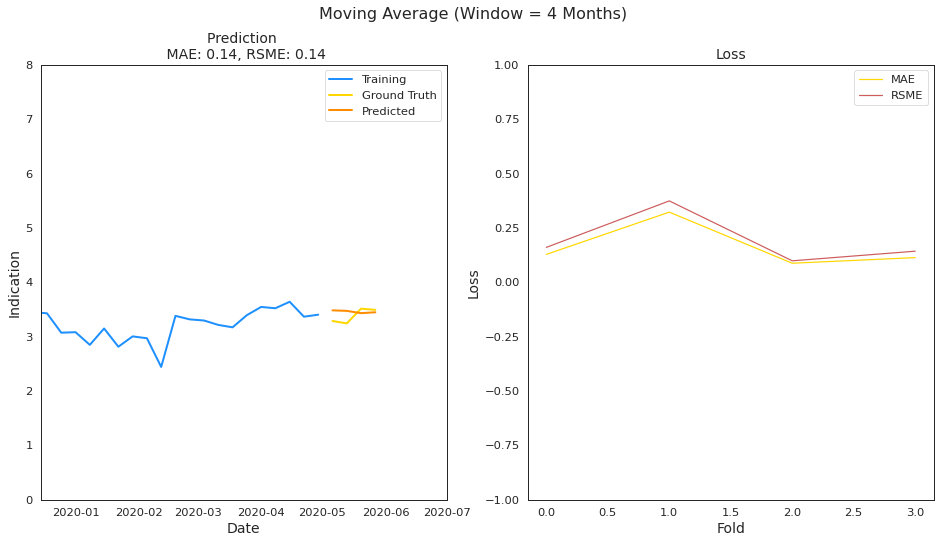

In [195]:
score_mae = []
score_rsme = []
for fold, valid_month_id in enumerate(range(2, N_SPLITS)):
    # Get indices for this fold
    train_index = df[df.month_idx < valid_month_id].index
    valid_index = df[df.month_idx == valid_month_id].index

    # Prepare training and validation data for this fold
    #X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    # Initialize y_valid_pred
    y_valid_pred = pd.Series(np.ones(len(y_valid)))
    
    # Prediction: Naive approach    
    for i in range(len(y_valid_pred)):
        y_valid_pred.iloc[i] = y_train.append(y_valid_pred.iloc[:(i)]).reset_index(drop=True).rolling(1).mean().iloc[-1]
        
    # Calcuate metrics
    score_mae.append(mean_absolute_error(y_valid, y_valid_pred))
    score_rsme.append(math.sqrt(mean_squared_error(y_valid, y_valid_pred)))

y_pred = pd.Series(np.zeros(len(X_test)))

for i in range(len(y_pred)):
    y_pred.iloc[i] = y.append(y_pred.iloc[:(i)]).reset_index(drop=True).rolling(4).mean().iloc[-1]

plot_approach_evaluation(y_pred, score_mae, score_rsme, 'Moving Average (Window = 4 Months)')

kai η προσέγγιση Naive και η προσέγγιση Moving Average έχουν καλά αποτελέσματα για την περιπτωση μας. Παρόλο αυτά συνήθως, αυτές οι προσεγγίσεις χρησιμεύουν ως σημείο αναφοράς και όχι ως μέθοδος επιλογής.

# ARIMA

Το μοντέλο Auto-Regressive Integrated Moving Average (ARIMA) περιγράφει τους αυτοσυσχετισμούς στα δεδομένα. Το μοντέλο υποθέτει ότι η χρονοσειρά είναι stationary. Αποτελείται από τρία κύρια μέρη:

Φίλτρο αυτόματης παλινδρόμησης (AR) (μακροπρόθεσμα):

𝑦𝑡 = 𝑐 + 𝛼1𝑦𝑡 − 1 +… 𝛼𝑝𝑦𝑡 − 𝑝 + 𝜖𝑡 = 𝑐 + ∑𝑝𝑖 = 1𝛼𝑖𝑦𝑡 − 𝑖 + 𝜖𝑡 -> p

Φίλτρο ολοκλήρωσης (στοχαστική τάση)

-> d

Φίλτρο κινητού μέσου όρου (MA) (βραχυπρόθεσμα):

𝑦𝑡 = 𝑐 + 𝜖𝑡 + 𝛽1𝜖𝑡 − 1 + ⋯ + 𝛽𝑞𝜖𝑡 − 𝑞 = 𝑐 + 𝜖𝑡 + ∑𝑞𝑖 = 1𝛽𝑖𝜖𝑡 − 𝑖 -> q

ARIMA( p, d, q)

p: Lag order (to determine see PACF in Autocorrelation Analysis)

d: Degree of differencing. (to determine see Differencing in Stationarity)

q: Order of moving average (to determine see ACF in Autocorrelation Analysis)

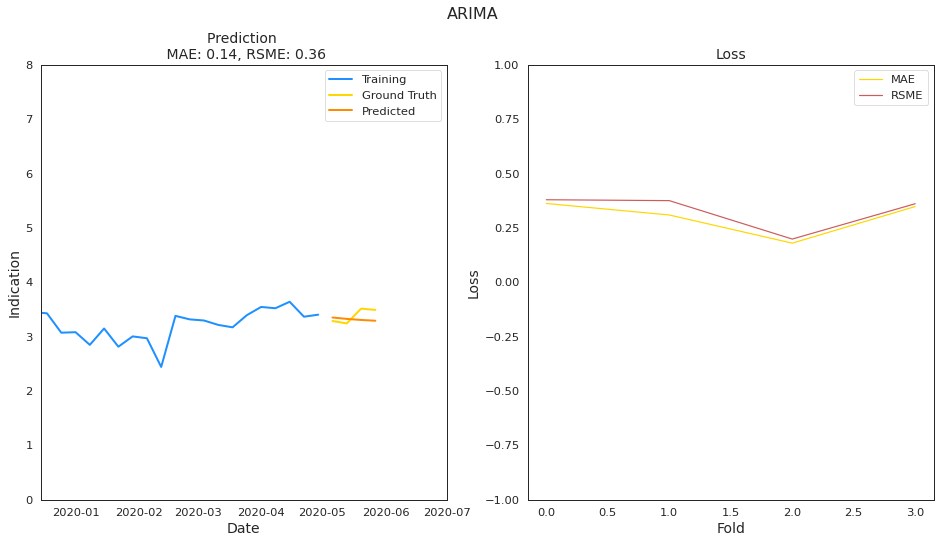

In [199]:
from statsmodels.tsa.arima_model import ARIMA

score_mae = []
score_rsme = []

for fold, valid_month_id in enumerate(range(2, N_SPLITS)):
    # Get indices for this fold
    train_index = df[df.month_idx < valid_month_id].index
    valid_index = df[df.month_idx == valid_month_id].index

    # Prepare training and validation data for this fold
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    # Fit model with Vector Auto Regression (VAR)
    model = ARIMA(y_train, order=(1,0,0))
    model_fit = model.fit()
    
    # Prediction with Vector Auto Regression (VAR)
    y_valid_pred = model_fit.predict(valid_index[0], valid_index[-1])

    # Calcuate metrics
    score_mae.append(mean_absolute_error(y_valid, y_valid_pred))
    score_rsme.append(math.sqrt(mean_squared_error(y_valid, y_valid_pred)))


# Fit model with Vector Auto Regression (VAR)
model = ARIMA(y, order=(1,0,0))
model_fit = model.fit()

# Prediction with Vector Auto Regression (VAR)
y_pred = model_fit.predict(y.index[-1]+1, y.index[-1] + len(y_test)).reset_index(drop=True)
plot_approach_evaluation(y_pred, score_mae, score_rsme, 'ARIMA')

# **2η Στατιστικη προσέγγιση ΑR-Ι-ΜΑ**

NameError: ignored

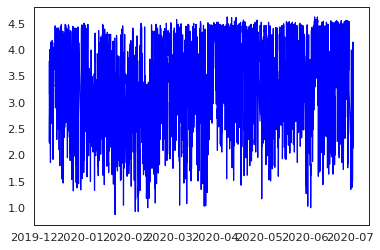

In [196]:
#Plot rolling statistics
orig = plt.plot(df1, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Από το παραπάνω γράφημα, βλέπουμε ότι ο ίδιος ο κυλιόμενος μέσος έχει ένα στοιχείο τάσης παρόλο που η τυπική απόκλιση κύλισης είναι αρκετά σταθερή με το χρόνο. Προκειμένου οι χρονοσειρές μας να είναι σταθερές, πρέπει να διασφαλίσουμε ότι τόσο τα κυλιόμενα στατιστικά στοιχεία, δηλαδή: μέση & std. dev παραμείνει αμετάβλητη του χρόνου ή σταθερή με το χρόνο. Έτσι, οι καμπύλες και για τους δύο πρέπει να είναι παράλληλες με τον άξονα Χ, ο οποίος στην περίπτωση μας το mean dev δεν είναι έτσι.

Για να αυξήσουμε περαιτέρω την υπόθεσή μας ότι οι χρονοσειρές δεν είναι σταθερές, ας πραγματοποιήσουμε τη δοκιμή ADCF.

In [200]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(df1['indication'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                  -23.793
p-value                           0.000
#Lags Used                        7.000
Number of Observations Used   19013.000
Critical Value (1%)              -3.431
Critical Value (5%)              -2.862
Critical Value (10%)             -2.567
dtype: float64


Για να είναι στατική μια σειρά, η δοκιμή ADCF πρέπει να έχει:

η τιμή p να είναι χαμηλή (σύμφωνα με την μηδενική υπόθεση)
Οι κρίσιμες τιμές στα διαστήματα εμπιστοσύνης 1%, 5%, 10% πρέπει να είναι όσο το δυνατόν πιο κοντά στα στατιστικά στοιχεία δοκιμής
Από το παραπάνω αποτέλεσμα της δοκιμής ADCF, βλέπουμε ότι η τιμή p (στο μέγιστο μπορεί να είναι 0,5) είναι στο όριο. Επίσης, οι κρίσιμες τιμές δεν απέχουν και πολύ απ'ο τις Στατιστικές δοκιμών. Ως εκ τούτου, μπορούμε να πούμε με ασφάλεια ότι η σειρά Χρόνου μας αυτή τη στιγμή δεν είναι σταθερή

## **Μετασχηματισμός δεδομένων για επίτευξη σταθερότητας**

Υπάρχουν μερικοί τρόποι για να επιτευχθεί η στασιμότητα μέσω του μετασχηματισμού δεδομένων όπως η λήψη log10, loge, τετραγωνικής, τετραγωνικής ρίζας, κύβου, ρίζας κύβου, εκθετικής αποσύνθεσης, μετατόπισης χρόνου και ούτω καθεξής.

Στη  μελέτη μας, θα ξεκινήσουμε με μετασχηματισμούς καταγραφής. Στόχος μας είναι να αφαιρέσουμε το στοιχείο της τάσης. Ως εκ τούτου, θα ελενξουμε μετά τη λήψη log λειτούργησε θετικά ο μετασχηματισμός δεδομένων μας δημιουργώντας  πιο επίπεδες καμπύλες (δηλαδή: παράλληλος σε άξονα x) για χρονοσειρές και κυλιόμενο μέσο .

###**Log Scale Transformation**

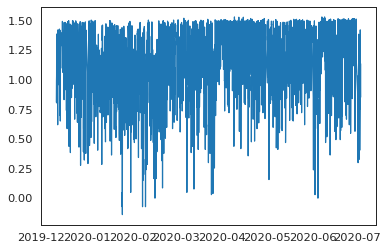

In [201]:
#Εκτίμηση τάσης
df1_logScale = np.log(df1)
plt.plot(df1_logScale)

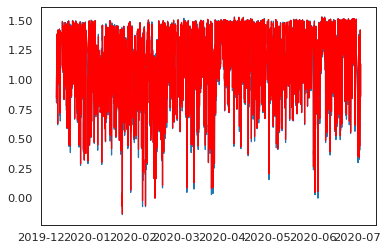

In [207]:
#Ο παρακάτω κυλιόμενος μετασχηματισμός απαιτείται για να κάνει τη σειρά στάσιμη
movingAverage = df1_logScale.rolling(window=2).mean()
movingSTD = df1_logScale.rolling(window=2).std()
plt.plot(df1_logScale)
plt.plot(movingAverage, color='red')

Από το παραπάνω γράφημα, βλέπουμε ότι παρόλο που ο κυλιόμενος μέσος όρος δεν είναι στατικός, είναι ακόμα καλύτερος από την προηγούμενη περίπτωση, όπου δεν εφαρμόστηκε μετατροπη στη σειρά. Έτσι μπορούμε τουλάχιστον να πούμε ότι βαδίζουμε προς τη σωστή κατεύθυνση.Παρακάτω ο έλεγχος στασιμότητας

In [208]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['indication'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

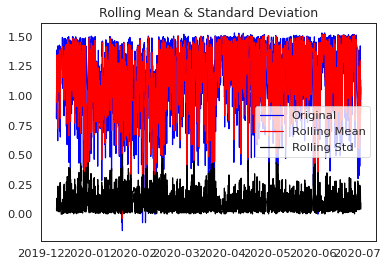

Results of Dickey Fuller Test:
Test Statistic                  -23.907
p-value                           0.000
#Lags Used                        7.000
Number of Observations Used   19013.000
Critical Value (1%)              -3.431
Critical Value (5%)              -2.862
Critical Value (10%)             -2.567
dtype: float64


In [209]:
test_stationarity(df1_logScale)

Η τιμή p έχει μειωθεί από 0.487361 σε 0.013471. Οι κρίσιμες τιμές σε διαστήματα εμπιστοσύνης 1%, 5%, 10% είναι πολύ κοντά στο Test Statistic. Έτσι, από τα παραπάνω 2 σημεία, μπορούμε να πούμε ότι η δεδομένη σειρά μας είναι στάσιμη με  μεγαλύτερη ακρίβεια.



Γνωρίζουμε από το παραπάνω γράφημα ότι τόσο η χρονολογική σειρά με λογαριθμική κλίμακα  όσο και ο κινούμενος μέσος όρος της έχουν συνιστώσα τάσης. Έτσι μπορούμε να εφαρμόσουμε ακομη μια τεχνοτροπία:
αφαίρεση το ένα από το προηγούμενο θα πρέπει να αφαιρέσει το στοιχείο τάσης και των δύο. 
Αναλυτικά:

logscaleL = stationarypart (L1) + τάση (LT)

movingavgoflogscaleA = stationarypart (A1) + τάση (AT)

Αποτελέσματα R = L − A = (L1 + LT) - (A1 + AT) = (L1 − A1) + (LT − AT)

Δεδομένου ότι τα L & A είναι σειρές και κινείται κατά μέσο όρο, η τάση τους θα είναι λίγο πολύ ίδια, ως εκ τούτου

Το LT-AT ισούται σχεδόν με 0

Έτσι, το στοιχείο της τάσης θα αφαιρεθεί σχεδόν. Και έχουμε,

R = L1 − A1, η τελική καμπύλη χωρίς τάσεις

In [210]:
df1LogScaleMinusMovingAverage = df1_logScale - movingAverage
df1LogScaleMinusMovingAverage.head(12)

#Remove NAN values
df1LogScaleMinusMovingAverage.dropna(inplace=True)
df1LogScaleMinusMovingAverage.head(10)

,indication
timestamp,
2019-12-11 06:00:00,0.036
2019-12-11 06:15:00,0.018
2019-12-11 06:30:00,0.006
2019-12-11 06:45:00,0.004
2019-12-11 07:00:00,0.006
2019-12-11 07:15:00,0.006
2019-12-11 07:30:00,0.006
2019-12-11 07:45:00,0.006
2019-12-11 08:00:00,0.004


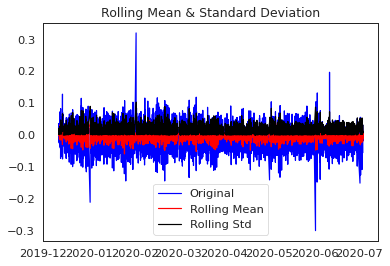

Results of Dickey Fuller Test:
Test Statistic                  -28.502
p-value                           0.000
#Lags Used                       45.000
Number of Observations Used   18974.000
Critical Value (1%)              -3.431
Critical Value (5%)              -2.862
Critical Value (10%)             -2.567
dtype: float64


In [211]:
test_stationarity(df1LogScaleMinusMovingAverage)

Από το παραπάνω γράφημα, παρατηρούμε ότι η διαίσθησή μας ότι «αφαιρώντας δύο σχετικές σειρές που έχουν παρόμοια στοιχεία τάσης θα κάνει το αποτέλεσμα σταθερό» είναι αλήθεια. Βρίσκουμε ότι:

Η τιμή p έχει μειωθεί από 0.487361 σε 7.782932e-10.
Οι κρίσιμες τιμές σε διαστήματα εμπιστοσύνης 1%, 5%, 10% απομακρύνονται σε σχέση με την ποηγούμενη προσσέγγιση στο Test Statistic. Έτσι, από τα παραπάνω 2 σημεία, μπορούμε να πούμε ότι η δεδομένη σειρά μας είναι στάσιμη επίσης.
Όμως, στο πνεύμα της μεγαλύτερης ακρίβειας, ας εξερευνήσουμε και προσπαθούμε να βρούμε μια καλύτερη κλίμακα από την τρέχουσα καταγραφή μας.



### **Expdecay**
Στο επομενο στάδιο θα δοκιμαστεί η εκθετική αποσύνθεση.

A. Μια ποσότητα υπόκειται σε εκθετική διάσπαση εάν μειώνεται με ρυθμό ανάλογο με την τρέχουσα τιμή του. Συμβολικά, αυτή η διαδικασία μπορεί να εκφραστεί με την ακόλουθη διαφορική εξίσωση, όπου Ν είναι η ποσότητα και λ (λάμδα) είναι ένας θετικός ρυθμός που ονομάζεται σταθερή εκθετικής αποσύνθεσης:

dN / dt = −λN
Η λύση σε αυτήν την εξίσωση (βλ. Παράγωγο παρακάτω) είναι:
N (t) = N0 ∗ e − λt
όπου N (t) είναι η ποσότητα στο χρόνο t και N0 = N (0) είναι η αρχική ποσότητα, δηλαδή η ποσότητα στο χρόνο t = 0.

Η μισή διάρκεια είναι ο χρόνος που απαιτείται για τη μείωση της ποσότητας που φθάνει στο μισό της αρχικής της τιμής.
 Συμβολίζεται με t1 / 2. Ο χρόνος μισής διάρκειας μπορεί να γραφτεί με όρους της σταθεράς αποσύνθεσης ως:

t1 / 2 = ln (2) / λ 

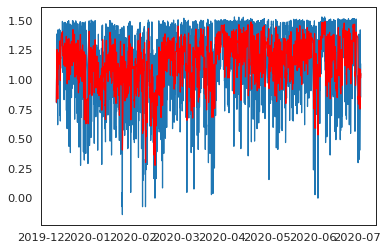

In [212]:
exponentialDecayWeightedAverage = df1_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(df1_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

Από το παραπάνω γράφημα, φαίνεται ότι η εκθετική αποσύνθεση δεν έχει κανένα πλεονέκτημα έναντι της λογαριθμικής μετατροπής  καθώς και οι δύο αντίστοιχες καμπύλες είναι σχεδόν παρόμοιες καθως οι καμπύλεσ είναι λίγο καλύτερες μετά το 2019. Εκτελούμε ξανά το τεστ ADCF στην παρακάτω σειρά αποσύνθεσης

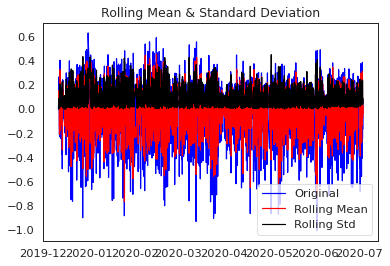

Results of Dickey Fuller Test:
Test Statistic                  -25.999
p-value                           0.000
#Lags Used                       45.000
Number of Observations Used   18975.000
Critical Value (1%)              -3.431
Critical Value (5%)              -2.862
Critical Value (10%)             -2.567
dtype: float64


In [213]:
df1LogScaleMinusExponentialMovingAverage = df1_logScale - exponentialDecayWeightedAverage
test_stationarity(df1LogScaleMinusExponentialMovingAverage)


Παρατηρούμε ότι η χρονοσειρά είναι στάσιμη και επίσης η σειρά για κίνηση avg & std. dev είναι  παράλληλες με τον άξονα Χ, έτσι δεν έχουν επίσης τάση.
Επίσης,

Η τιμή p έχει μειωθεί από 0.487361 σε 5.250436e-08.
Η τιμή Test Statistic είναι το ίδιο  κοντά στις κρίσιμες τιμές.
Και τα δύο σημεία λένε ότι ο τρέχων μετασχηματισμός μας είναι ίδιος από τον προηγούμενο μετασχηματισμό. Παρόλο που δεν μπορούσαμε να παρατηρήσουμε διαφορές κοιτάζοντας οπτικά τα γραφήματα, οι δοκιμές επιβεβαίωσαν ότι η είναι περιπου ιδιες.
Αλλά ας δοκιμάσουμε μια ακόμη φορά και να βρούμε αν υπάρχει ακόμη καλύτερη λύση. Θα δοκιμάσουμε την απλή τεχνική χρονικής μετατόπισης, η οποία είναι απλώς:

Δεδομένου ενός συνόλου παρατήρησης σχετικά με τις χρονοσειρές:

x0, x1, x2, x3, .... xn
Οι μετατοπισμένες τιμές θα είναι:

null, x0, x1, x2, .... xn <---- βασικά όλα τα xi μετατοπίστηκαν κατά 1 θέση προς τα δεξιά

Έτσι, οι χρονοσειρές με τις μετατοπισμένες τιμές είναι:

null, (x1 − x0), (x2 − x1), (x3 − x2), (x4 − x3), .... (xn − xn − 1) 

### **Χρονική μετατόπιση -time shift Transformation**

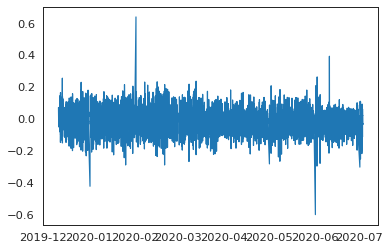

In [214]:
df1LogDiffShifting = df1_logScale - df1_logScale.shift()
plt.plot(df1LogDiffShifting)

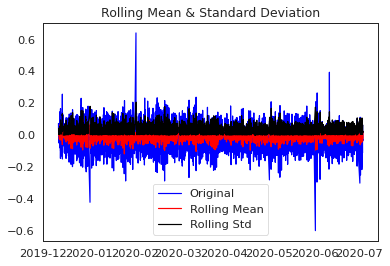

Results of Dickey Fuller Test:
Test Statistic                  -28.502
p-value                           0.000
#Lags Used                       45.000
Number of Observations Used   18974.000
Critical Value (1%)              -3.431
Critical Value (5%)              -2.862
Critical Value (10%)             -2.567
dtype: float64


In [215]:
df1LogDiffShifting.dropna(inplace=True)
test_stationarity(df1LogDiffShifting)

Από τα παραπάνω 2 γραφήματα, μπορούμε να δούμε ότι, οπτικά, αυτό είναι το καλύτερο αποτέλεσμα καθώς η σειρά μας μαζί με τις μετατοπισμένες  στατιστικές τιμές του κινούμενου μέσου και του κινούμενου std. dev είναι πολύ επίπεδη και σταθερή. Όμως, η δοκιμή ADCF μάς δείχνει ότι:

Η τιμή p του 1.542290e-21  είναι πολύ μικρή όπως τους προηγούμενους μετασχηματισμούς.
Η τιμή test-statistics σε σχέση με τις  κρίσιμες τιμές είναι όσο απο του rolling mean και st. dev.μετασχηματισμο , όχι η καλύτερη.




## **Decompose**

Δοκιμάσαμε λοιπόν 3 διαφορετικούς μετασχηματισμούς: log, exp decay & time shift. 
Για απλότητα, θα ακολουθήσουμε την λογαριθμική μετατροπή . Ο λόγος για αυτό είναι ότι μπορούμε να επανέλθουμε στην αρχική κλίμακα κατά τη διάρκεια των προβλέψεων.

Ας αναλύσουμε τώρα τα 3 στοιχεία της σειράς λογαριθμικής μετατροπής  χρησιμοποιώντας την  συνάρτηση decompose(). Μόλις διαχωρίσουμε τα στοιχεία μας, μπορούμε απλά να αγνοήσουμε την τάση και την εποχικότητα και να ελέγξουμε τη φύση του υπόλειπου μέρους.

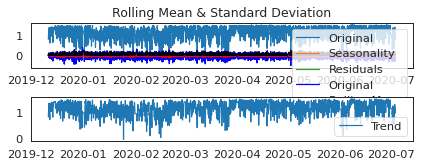

Results of Dickey Fuller Test:
Test Statistic                  -36.625
p-value                           0.000
#Lags Used                       45.000
Number of Observations Used   18975.000
Critical Value (1%)              -3.431
Critical Value (5%)              -2.862
Critical Value (10%)             -2.567
dtype: float64


In [216]:
decomposition = seasonal_decompose(df1_logScale, freq=12, model='additive', extrapolate_trend='freq')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df1_logScale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

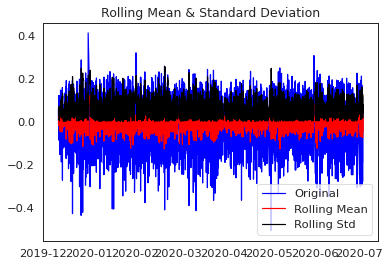

Results of Dickey Fuller Test:
Test Statistic                  -36.625
p-value                           0.000
#Lags Used                       45.000
Number of Observations Used   18975.000
Critical Value (1%)              -3.431
Critical Value (5%)              -2.862
Critical Value (10%)             -2.567
dtype: float64


In [217]:
# μπορεί να υπάρχουν περιπτώσεις όπου μια παρατήρηση αποτελείται απλώς από τάση και εποχικότητα. Σε αυτήν την περίπτωση, δεν θα υπάρξει
# οποιοδήποτε υπολειπόμενο συστατικό και αυτό θα είναι μηδενικό ή NaN. Ως εκ τούτου, καταργούμε επίσης τέτοιες περιπτώσεις
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

## **Autocorellation-ACF&PACF**

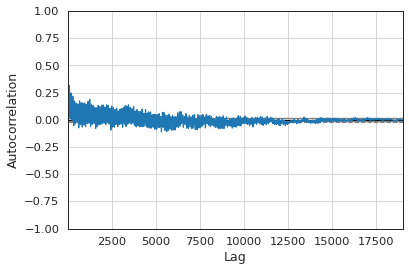

In [218]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df1_logScale)
plt.show()

**Plotting ACF & PACF**

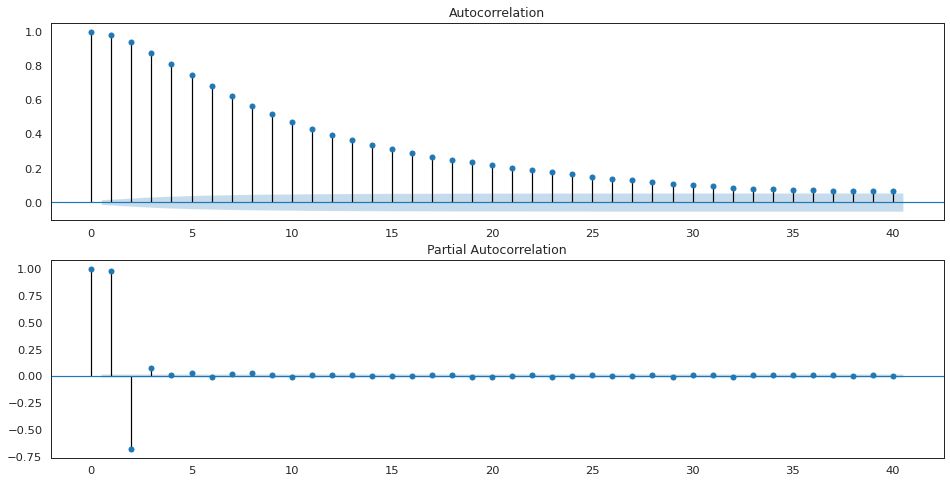

In [219]:
#ACF & PACF plots


f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df1_logScale,lags=40, ax=ax[0])
plot_pacf(df1_logScale,lags=40, ax=ax[1])
plt.show()
    

Από το γράφημα ACF, βλέπουμε ότι η καμπύλη αγγίζει τη γραμμή y = 0,0 στο x =1. Έτσι, από θεωρία, Q = 2 Από το γράφημα PACF, βλέπουμε ότι η καμπύλη αγγίζει τη γραμμή y = 0,0 στο x = 1. Έτσι, από τη θεωρία, P = 1

Το ARIMA είναι AR + I + MA. Πριν εξετάσουμε ένα μοντέλο ARIMA, ας ελέγξουμε τα αποτελέσματα του μεμονωμένου μοντέλου AR & MA. 
Αυτά τα μοντέλα θα δώσουν μια τιμή RSS. Οι χαμηλότερες τιμές RSS υποδεικνύουν ένα καλύτερο μοντέλο.

## **Building Models**

## **ARIMA**

Plotting AR model


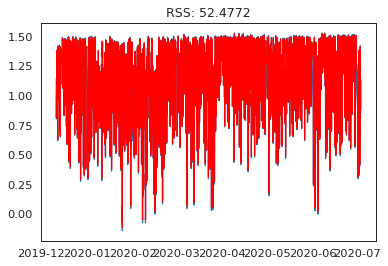

In [222]:
#AR Model
#making order=(2,1,0) gives RSS=1.5023
model = ARIMA(df1_logScale, order=(1,0,0))
results_AR = model.fit(disp=-1)
plt.plot(df1_logScale)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - df1_logScale['indication'])**2))
print('Plotting AR model')

Plotting MA model


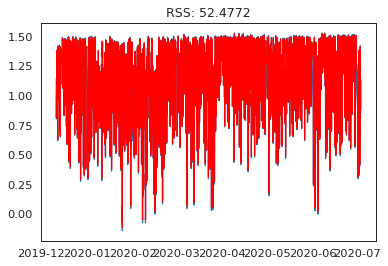

In [223]:
#MA Model
model = ARIMA(df1_logScale, order=(1,0,0))
results_MA = model.fit(disp=-1)
plt.plot(df1_logScale)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - df1_logScale['indication'])**2))
print('Plotting MA model')

Plotting ARIMA model


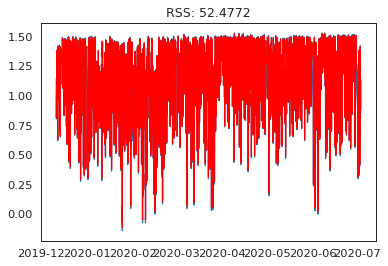

In [225]:
# AR+I+MA = ARIMA model
model = ARIMA(df1_logScale, order=(1,0,0))
results_ARIMA = model.fit(disp=-1)
plt.plot(df1_logScale)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - df1_logScale['indication'])**2))
print('Plotting ARIMA model')

In [226]:
print(results_ARIMA.summary())

                              ARMA Model Results                              
Dep. Variable:             indication   No. Observations:                19021
Model:                     ARMA(1, 0)   Log Likelihood               29073.080
Method:                       css-mle   S.D. of innovations              0.052
Date:                Sat, 27 Mar 2021   AIC                         -58140.160
Time:                        13:40:27   BIC                         -58116.601
Sample:                             0   HQIC                        -58132.434
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.1472      0.020     57.751      0.000       1.108       1.186
ar.L1.indication     0.9809      0.001    696.013      0.000       0.978       0.984
                            

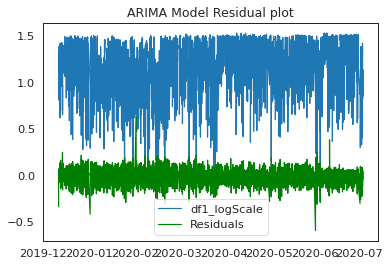

In [227]:
plt.plot(df1_logScale, label = 'df1_logScale')
plt.plot(results_ARIMA.resid, color ='green',label= 'Residuals')
plt.title('ARIMA Model Residual plot')
plt.legend(loc = 'best')

count   19021.000
mean        0.000
std         0.053
min        -0.593
25%        -0.017
50%         0.008
75%         0.025
max         0.631
dtype: float64


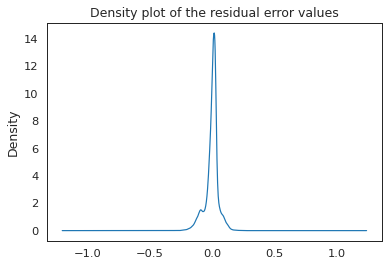

In [228]:
results_ARIMA.resid.plot(kind='kde')
plt.title('Density plot of the residual error values')
print(results_ARIMA.resid.describe())

###**Προβλεψη και αντιστροφή των μετασχηματισμών**

In [229]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.tail())

timestamp
2020-07-03 11:30:00   1.011
2020-07-03 11:45:00   0.982
2020-07-03 12:00:00   0.948
2020-07-03 12:15:00   0.917
2020-07-03 12:30:00   0.889
dtype: float64


In [230]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

timestamp
2019-12-11 05:45:00       1.147
2019-12-11 06:00:00       1.965
2019-12-11 06:15:00       2.853
2019-12-11 06:30:00       3.778
2019-12-11 06:45:00       4.714
                         ...   
2020-07-03 11:30:00   21849.129
2020-07-03 11:45:00   21850.111
2020-07-03 12:00:00   21851.059
2020-07-03 12:15:00   21851.975
2020-07-03 12:30:00   21852.864
Length: 19021, dtype: float64


In [231]:
predictions_ARIMA_log = pd.Series(df1_logScale['indication'].iloc[0], index=df1_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

timestamp
2019-12-11 05:45:00   1.958
2019-12-11 06:00:00   2.775
2019-12-11 06:15:00   3.664
2019-12-11 06:30:00   4.589
2019-12-11 06:45:00   5.525
dtype: float64

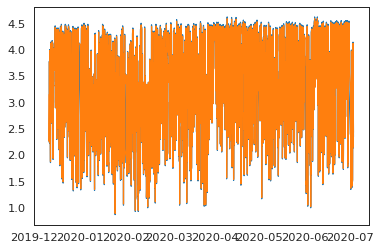

In [232]:
# Inverse of log is exp.
predictions_ARIMA = np.exp(predictions_ARIMA_diff)
plt.plot(df1)
plt.plot(predictions_ARIMA)


In [233]:
predictions_ARIMA

timestamp
2019-12-11 05:45:00   3.149
2019-12-11 06:00:00   2.264
2019-12-11 06:15:00   2.432
2019-12-11 06:30:00   2.521
2019-12-11 06:45:00   2.550
                       ... 
2020-07-03 11:30:00   2.747
2020-07-03 11:45:00   2.669
2020-07-03 12:00:00   2.580
2020-07-03 12:15:00   2.501
2020-07-03 12:30:00   2.432
Length: 19021, dtype: float64

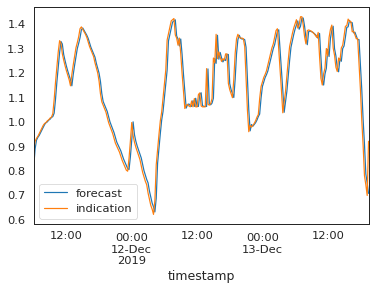

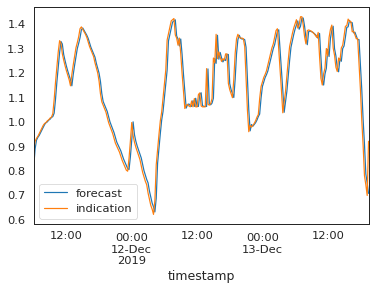

In [234]:
#Έχουμε 235(δεδομένα 19,5 χρόνια σε μήνες) data points. 
#και θέλουμε να προβλέψουμε του επόμενους 12 data points ή 12 μήνες 
results_ARIMA.plot_predict(1,247) 


In [235]:
results = results_ARIMA.forecast(steps=12)    
print(np.exp(results[0]))

[2.36317935 2.37617876 2.38899933 2.40164221 2.4141086  2.42639974
 2.43851689 2.45046137 2.46223454 2.47383778 2.4852725  2.49654015]


# **Facebook’s Prophet Model for Time Series Forecasting**

Prophet for forecasting
Το Prophet είναι λογισμικό ανοιχτού κώδικα που κυκλοφόρησε από την ομάδα Core Data Science του Facebook. Το Profet είναι μια διαδικασία για την πρόβλεψη δεδομένων χρονοσειρών βασισμένων σε ένα πρόσθετο μοντέλο όπου οι μη γραμμικές τάσεις ταιριάζουν με την ετήσια, εβδομαδιαία και καθημερινή εποχικότητα, καθώς και εφέ διακοπών. Λειτουργεί καλύτερα με χρονοσειρές που έχουν ισχυρά εποχιακά εφέ και πολλές εποχές ιστορικών δεδομένων . Το Prophet είναι ανθεκτικό στα ελλείποντα δεδομένα και μετατοπίζει την τάση, και συνήθως χειρίζεται καλά τα outliers.


In [236]:
import pandas as pd 
from fbprophet import Prophet



In [237]:
df3 = df.rename(columns = {'timestamp': 'ds', 'indication': 'y'}, inplace = False)


### Check TimeSeries **Stationarity**

In [238]:
from matplotlib import pyplot
import plotly.graph_objects as go
import statsmodels.api 
# adfuller library 
from statsmodels.tsa.stattools import adfuller
#  kpss library
from statsmodels.tsa.stattools import kpss

def summary_statistics(series):
    X = series.values
    split = round(len(X) / 2)
    X1, X2 = X[0:split], X[split:]
    mean1, mean2 = X1.mean(), X2.mean()
    var1, var2 = X1.var(), X2.var()
    print('Summary Statistics')
    print('mean1=%f, mean2=%f' % (mean1, mean2))
    print('variance1=%f, variance2=%f' % (var1, var2))
    print('')


# check_adfuller
def check_adfuller(series):
    # Dickey-Fuller test
    print ('Results of adfuller Test:')
    result = adfuller(series, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
    print('')
    

#define KPSS
def check_kpss(series):
    print ('Results of KPSS Test:')
    result = kpss(series, regression='c', lags='auto')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[3])
    print('')


# check_mean_std
def check_mean_std(series):
    #Rolling statistics
    TS = series
    TS['rollmean'] = TS.y.rolling(12).mean()
    TS['rollstd'] = TS.y.rolling(12).std()

    # Create traces
    fig = go.Figure()
    fig.add_trace(go.Scatter(x = TS['ds'], y=TS['y'], name='Original'))
    fig.add_trace(go.Scatter(x = TS['ds'], y=TS['rollmean'], name='Rollling Mean'))
    fig.add_trace(go.Scatter(x = TS['ds'], y=TS['rollstd'], name='Rolling Std'))
    fig.update_layout(title='Check Stationarity with Rolling Mean and Rolling Std ',xaxis_title='Datetime')
    fig.show()
    TS.drop(['rollmean','rollstd'],axis=1,inplace=True)

# Examine the patterns of ACF and PACF (along with the time series plot and histogram)

def tsplot(ts, lags=None, title='', figsize=(14, 8)):
    '''Examine the patterns of ACF and PACF, along with the time series plot and histogram.
    '''
    y = ts.y
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax   = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax  = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title)
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('Histogram')
    plot_acf(y, lags=lags, ax=acf_ax)
    plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    fig.tight_layout()
    
    summary_statistics(y)
    check_adfuller(y)
    check_kpss(y)
    check_mean_std(ts)
    
    return ts_ax, acf_ax, pacf_ax

Summary Statistics
mean1=3.106021, mean2=3.388758
variance1=0.068106, variance2=0.060872

Results of adfuller Test:
Test statistic:  -3.2800670332574993
p-value:  0.0157933324724339
Critical Values: {'1%': -3.6790595944893187, '5%': -2.9678817237279103, '10%': -2.6231583472057074}

Results of KPSS Test:
Test statistic:  0.31618125551574294
p-value:  0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}



(<matplotlib.axes._subplots.AxesSubplot at 0x7f27d024e090>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f27c243cad0>)

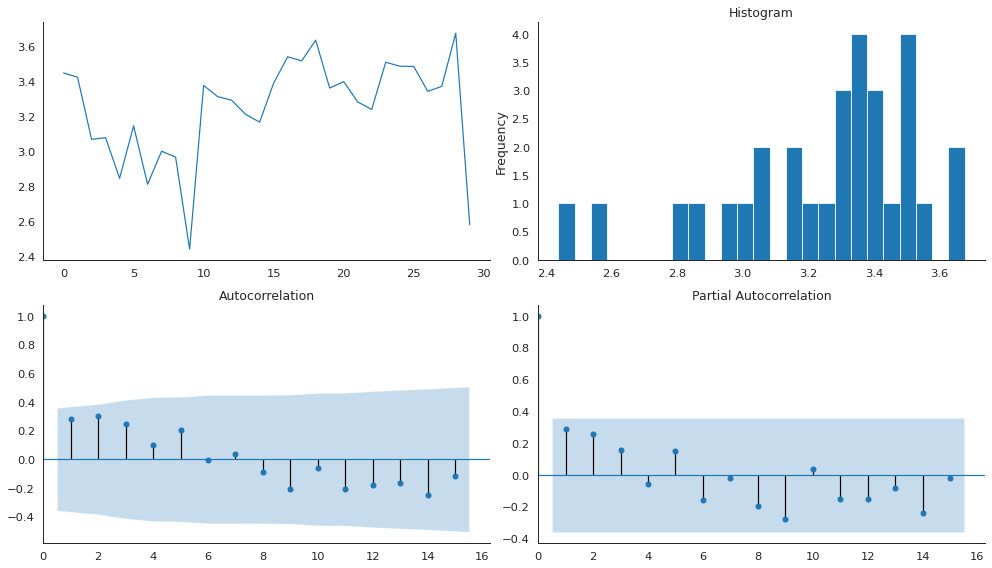

In [239]:
tsplot(df3)

###**Differencing**

Summary Statistics
mean1=0.045691, mean2=-0.051744
variance1=0.014274, variance2=0.018339

Results of adfuller Test:
Test statistic:  -2.929514023554696
p-value:  0.0420219941575514
Critical Values: {'1%': -4.473135048010974, '5%': -3.28988060356653, '10%': -2.7723823456790124}

Results of KPSS Test:
Test statistic:  0.17368358563128847
p-value:  0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}



(<matplotlib.axes._subplots.AxesSubplot at 0x7f27c10cf090>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f27c2270690>)

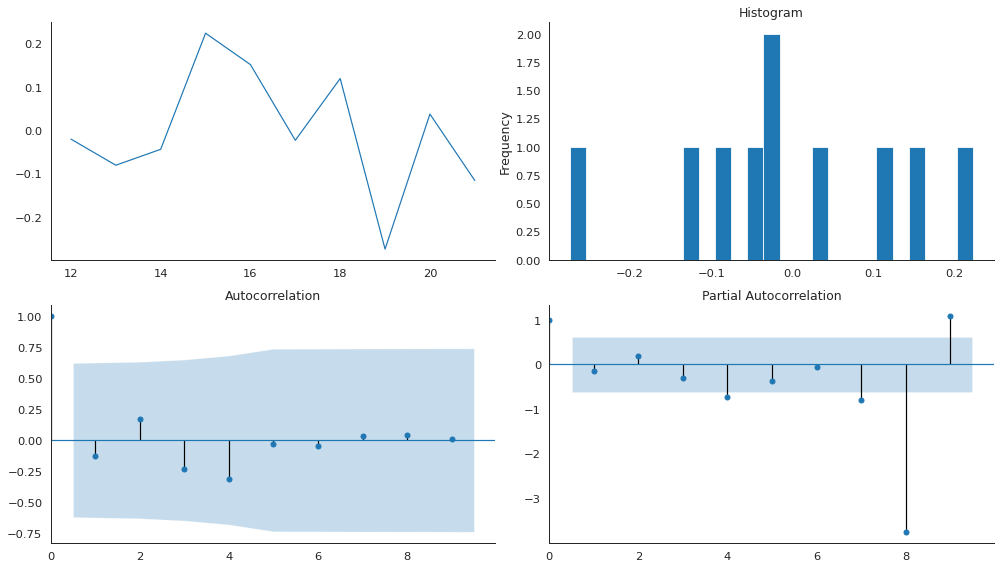

In [240]:
df3.y = df3.y.diff()
df3.dropna(inplace=True)
# visualization
tsplot(df3)

###**Seasonal Differencing**

Summary Statistics
mean1=0.098194, mean2=-0.200228
variance1=0.021618, variance2=0.040031

Results of adfuller Test:
Test statistic:  -1.726460531749371
p-value:  0.41753335440840844
Critical Values: {'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}

Results of KPSS Test:
Test statistic:  0.40713441164158265
p-value:  0.07407999498207644
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}



(<matplotlib.axes._subplots.AxesSubplot at 0x7f27c0f371d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f27c0e27b10>)

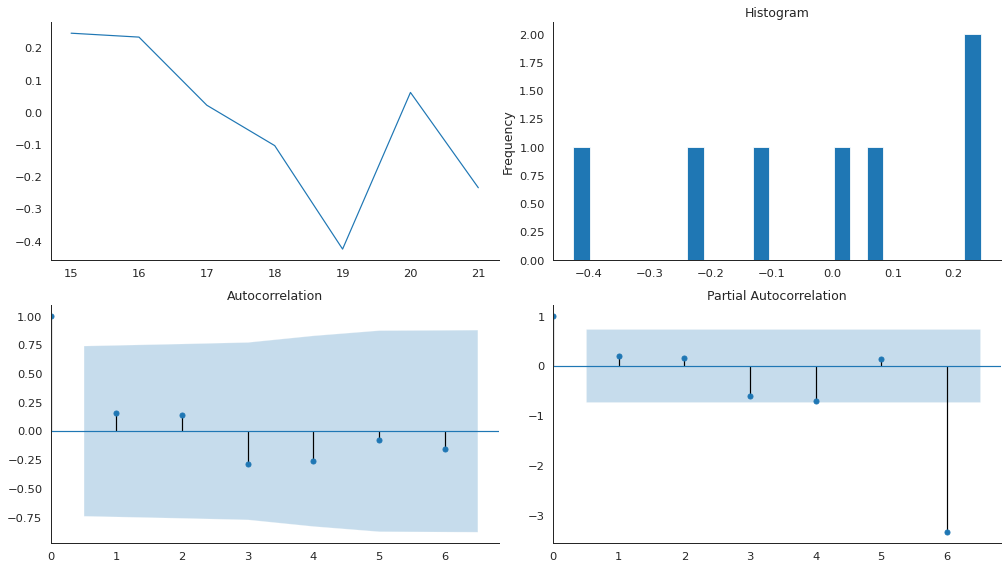

In [241]:
# Seasonal differencing
df3.y =  df3.y.diff(3)
df3.dropna(inplace=True)
# visualization
tsplot(df3)

In [242]:
model = Prophet()
model.fit(df3)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


Το επόμενο βήμα είναι να προετοιμάσουμε το μοντέλο μας για να κάνουμε μελλοντικές προβλέψεις. Αυτό επιτυγχάνεται χρησιμοποιώντας τη μέθοδο Prophet.make_future_dataframe και περνώντας τον αριθμό των ημερών για πρόβλεψη στο μέλλον. Χρησιμοποιούμε το χαρακτηριστικό περίοδοι για να το καθορίσουμε.

In [244]:
future = model.make_future_dataframe(periods=4)
future.tail()

,ds
6,2020-05-06
7,2020-05-07
8,2020-05-08
9,2020-05-09
10,2020-05-10


Στο κομμάτι κώδικα παραπάνω, δώσαμε εντολή στον Prophet να δημιουργήσει 12 σφραγίδες δεδομένων(μήνες) στο μέλλον.
Μετά από αυτό χρησιμοποιήστε τη μέθοδο πρόβλεψης για να κάνετε μελλοντικές προβλέψεις. Αυτό θα δημιουργήσει ένα πλαίσιο δεδομένων με μια στήλη yhat που θα περιέχει τις προβλέψεις. ΤοProfet επιστρέφει ένα μεγάλο DataFrame με πολλές  στήλες, αλλά παρακάτω αναλύονται οι στήλες που σχετίζονται περισσότερο με τις προβλέψεις.

In [245]:
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-25,0.207,-0.007,0.396,0.207,0.207,0.000,0.000,0.000,0.000,0.000,0.000,0.207
1,2020-04-01,0.128,-0.063,0.330,0.128,0.128,0.000,0.000,0.000,0.000,0.000,0.000,0.128
2,2020-04-08,0.049,-0.165,0.249,0.049,0.049,0.000,0.000,0.000,0.000,0.000,0.000,0.049
3,2020-04-15,-0.029,-0.221,0.174,-0.029,-0.029,0.000,0.000,0.000,0.000,0.000,0.000,-0.029
4,2020-04-22,-0.108,-0.303,0.098,-0.108,-0.108,0.000,0.000,0.000,0.000,0.000,0.000,-0.108


 yhat είναι η προβλεπόμενη πρόβλεψή μας, 
 yhat_lower είναι το κατώτερο όριο για τις προβλέψεις μας
 και yhat_upper είναι το ανώτερο όριο για τις προβλέψεις μας. 
 ds: η σφραγίδα δεδομένων της προβλεπόμενης τιμής yhat:
  η προβλεπόμενη τιμή της μέτρησης μας (στα στατιστικά στοιχεία, είναι μια σημειογραφία που χρησιμοποιείται παραδοσιακά για να αντιπροσωπεύει τις προβλεπόμενες τιμές μιας τιμής y) 
  yhat_lower: το κάτω όριο των προβλέψεών μας yhat_upper:
   το ανώτερο όριο του τις προβλέψεις μας

In [246]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-03-25,0.207,-0.007,0.396
1,2020-04-01,0.128,-0.063,0.330
2,2020-04-08,0.049,-0.165,0.249
3,2020-04-15,-0.029,-0.221,0.174
4,2020-04-22,-0.108,-0.303,0.098


Τώρα ας σχεδιάσουμε την πρόβλεψη χρονοσειρών, ο Prophet έχει μια ενσωματωμένη δυνατότητα που μας επιτρέπει να σχεδιάσουμε τις προβλέψεις που μόλις δημιουργήσαμε. Αυτό επιτυγχάνεται χρησιμοποιώντας το mode.plot () και περνάμε στις προβλέψεις μας ως όρισμα.

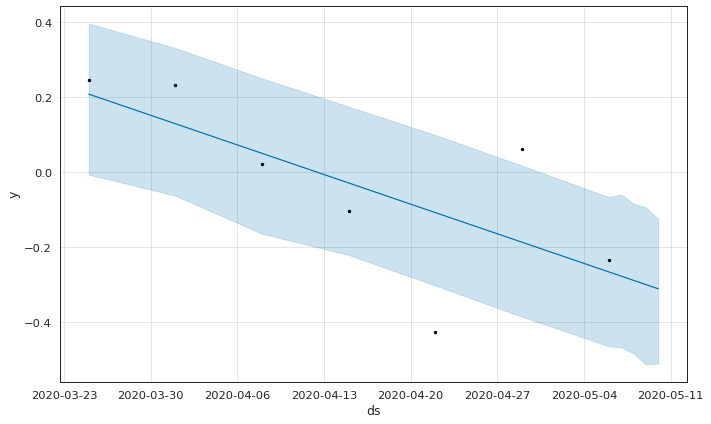

In [247]:
plot1 = model.plot(forecast)

Παραπάνω  μπορούμε να δούμε το Prophet σχεδιάζει τις παρατηρούμενες τιμές των χρονοσειρών μας (τις μαύρες κουκκίδες), τις προβλεπόμενες τιμές (μπλε γραμμή) και τα διαστήματα αβεβαιότητας των προβλέψεών μας (οι μπλε σκιασμένες περιοχές). Τέλος, το Prophet έχει ισχυρή δυνατότητα να επιστρέψει τα στοιχεία των προβλέψεών μας χρησιμοποιώντας τη μέθοδο plot_components. Σχεδιάζει την τάση, ετήσια και εβδομαδιαία εποχικότητα των δεδομένων χρονοσειρών.

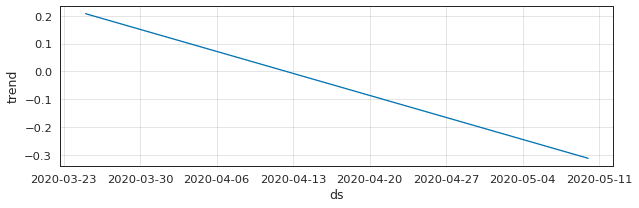

In [248]:
plot2 = model.plot_components(forecast)

**LSTM**

In [261]:
df4=df1.reset_index()

In [262]:
df4.columns

Index(['timestamp', 'indication'], dtype='object')

In [264]:
df4.shape

(19021, 2)

In [265]:
df4.isnull().sum()

timestamp     0
indication    0
dtype: int64

In [266]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19021 entries, 0 to 19020
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   timestamp   19021 non-null  datetime64[ns]
 1   indication  19021 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 297.3 KB


In [267]:
df4['date'] = pd.to_datetime(df4['timestamp'])
df4['indication'] = pd.to_numeric(df4['indication'], errors='coerce')
#df = df.dropna(subset=['indication'])
df4['year'] = df4['date'].apply(lambda x: x.year)
df4['quarter'] = df4['date'].apply(lambda x: x.quarter)
df4['month'] = df4['date'].apply(lambda x: x.month)
df4['day'] = df4['date'].apply(lambda x: x.day)
df4=df4.loc[:,['date','indication', 'year','quarter','month','day']]
df4.sort_values('date', inplace=True, ascending=True)
df4 = df4.reset_index(drop=True)
print(df4.shape)
print(df4.date.min())
print(df4.date.max())
df4.head(80)

(19021, 6)
2019-12-11 05:45:00
2020-07-03 12:30:00


,date,indication,year,quarter,month,day
0,2019-12-11 05:45:00,2.250,2019,4,12,11
1,2019-12-11 06:00:00,2.420,2019,4,12,11
2,2019-12-11 06:15:00,2.510,2019,4,12,11
3,2019-12-11 06:30:00,2.540,2019,4,12,11
4,2019-12-11 06:45:00,2.560,2019,4,12,11
...,...,...,...,...,...,...
75,2019-12-12 00:30:00,2.500,2019,4,12,12
76,2019-12-12 00:45:00,2.450,2019,4,12,12
77,2019-12-12 01:00:00,2.410,2019,4,12,12
78,2019-12-12 01:15:00,2.370,2019,4,12,12


###**Normality test**



Δοκιμή στατιστικής κανονικότητας
Υπάρχουν πολλές στατιστικές δοκιμές που μπορούμε να χρησιμοποιήσουμε για να προσδιορίσουμε εάν τα δεδομένα μας μοιάζουν σαν να προέρχονται από μια κατανομή Gauss. Και θα χρησιμοποιήσουμε τη δοκιμή K ^ 2 του D'Agostino.

Στην υλοποίηση του τεστ SciPy, θα ερμηνεύσουμε την τιμή p ως εξής.

p <= άλφα: απόρριψη H0, όχι φυσιολογικό
p> alpha: αποτυχία απόρριψης του H0, κανονικό.

In [269]:
stat, p = stats.normaltest(df4.indication)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=1152.463, p=0.000
Data does not look Gaussian (reject H0)


### **Kurtosis and Skewness**

Μπορούμε επίσης να υπολογίσουμε την κύρτoση και την ασυμμετρία, για να προσδιορίσουμε εάν η διανομή δεδομένων αποκλίνει από την κανονική κατανομή.

count   19021.000
mean        3.262
std         0.787
min         0.870
25%         2.690
50%         3.300
75%         3.920
max         4.630
Name: indication, dtype: float64
Kurtosis of normal distribution: -0.6640748421265674
Skewness of normal distribution: -0.3194235771047261


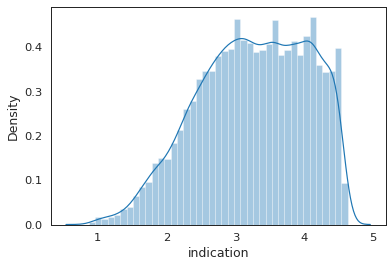

In [272]:
print(df4.indication.describe())
sns.distplot(df4.indication);
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(df4.indication)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(df4.indication)))

KURTOSIS: περιγράφει το βάρος των ουρών μιας διανομής

Η κανονική κατανομή έχει κύρτoση κοντά στο 0. Εάν η κούρτιση είναι μεγαλύτερη από μηδέν, τότε η κατανομή έχει βαρύτερες ουρές. Εάν η κουρτίωση είναι μικρότερη από το μηδέν, τότε η κατανομή είναι ελαφρές ουρές. Tο Kurtosis μας είναι μεγαλύτερο από το μηδέν.


SKEWNESS:
Εάν η ασυμμετρια κυμαίνεται μεταξύ -0,5 και 0,5, τα δεδομένα είναι αρκετά συμμετρικά. Εάν η ασυμμετρία κυμαίνεται μεταξύ -1 και - 0,5 ή μεταξύ 0,5 και 1, τα δεδομένα είναι μέτρια λοξά. Εάν η ασυμμετρία είναι μικρότερη από -1 ή μεγαλύτερη από 1, τα δεδομένα είναι πολύ κεκλιμένα. Και η ασυμμετρία μας είναι μεγαλύτερη από 1.


### **TIMEseries PLOT**

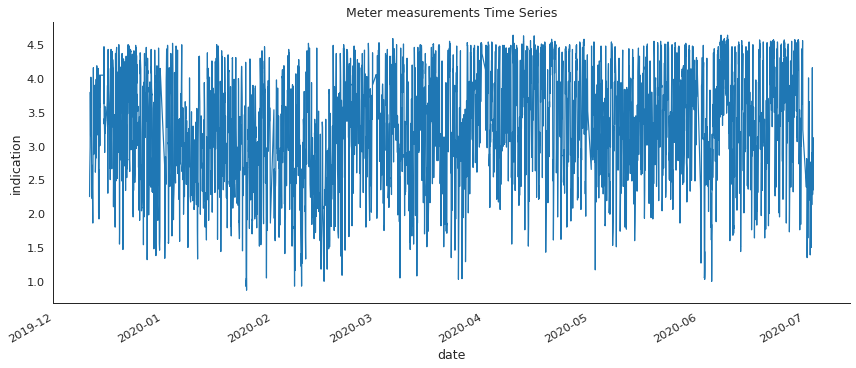

In [273]:
dfplot=df4.loc[:,['date','indication']]
dfplot.set_index('date',inplace=True)
dfplot.plot(figsize=(12,5))
plt.ylabel('indication')
plt.legend().set_visible(False)
plt.tight_layout()
plt.title('Meter measurements Time Series')
sns.despine(top=True)
plt.show();

### **Box plot of yearly vs. quarterly**

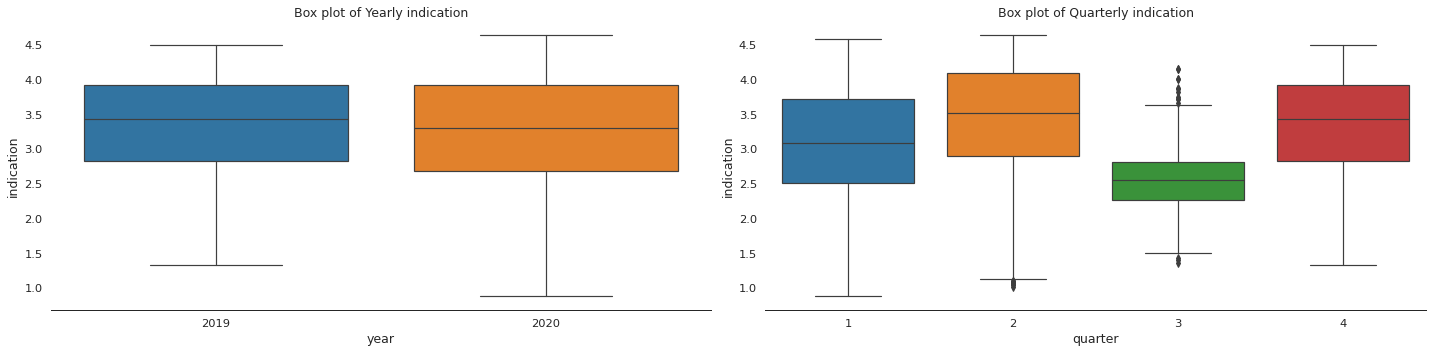

In [274]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.2)
sns.boxplot(x="year", y="indication", data=df4)
plt.xlabel('year')
plt.title('Box plot of Yearly indication')
sns.despine(left=True)
plt.tight_layout() 

plt.subplot(1,2,2)
sns.boxplot(x="quarter", y="indication", data=df4)
plt.xlabel('quarter')
plt.title('Box plot of Quarterly indication')
sns.despine(left=True)
plt.tight_layout();

Όταν συγκρίνουμε το boxplot δίπλα-δίπλα για κάθε χρόνο, παρατηρούμε ότι η διάμεση ένδειξη το 2019 είναι πολύ υψηλότερη από τα άλλα χρόνια . Αυτό είναι λίγο παραπλανητικό.
Sύμφωνο με την 4μηνιαία διάμεση ένδειξη, είναι σχεδόν ίσο με όλες τις εποχές).

### **Meter indication Distribution**
Κατανομή ένδειξης μετρητή

,count,mean,std,min,25%,50%,75%,max
indication,19021.000,3.262,0.787,0.870,2.690,3.300,3.920,4.630
year,19021.000,2019.899,0.302,2019.000,2020.000,2020.000,2020.000,2020.000
quarter,19021.000,1.768,0.897,1.000,1.000,2.000,2.000,4.000
month,19021.000,4.396,3.038,1.000,2.000,4.000,6.000,12.000
day,19021.000,16.075,8.480,1.000,9.000,16.000,23.000,31.000


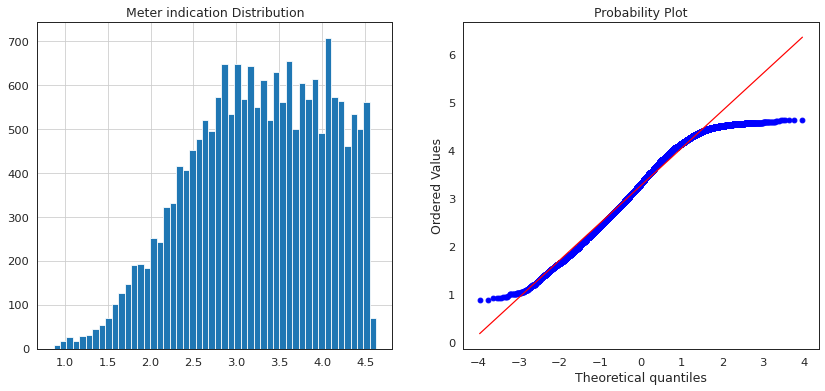

In [278]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df4['indication'].hist(bins=50)
plt.title('Meter indication Distribution')

plt.subplot(1,2,2)
stats.probplot(df4['indication'], plot=plt);
df4.describe().T

Η κανονική πιθανότητα δείχνει επίσης ότι το σύνολο δεδομένων δεν απέχει πολύ από το κανονικά κατανεμημένο.

### **Average Meter indication resampled over  month, quarter and year**

Η μέση ένδειξη μετρητή επαναπροσδιορίζεται κατά τη διάρκεια  του μήνα, του τετραμήνου  και του έτους.

In [279]:
dfAMI=df4.set_index(['date'],inplace=True)


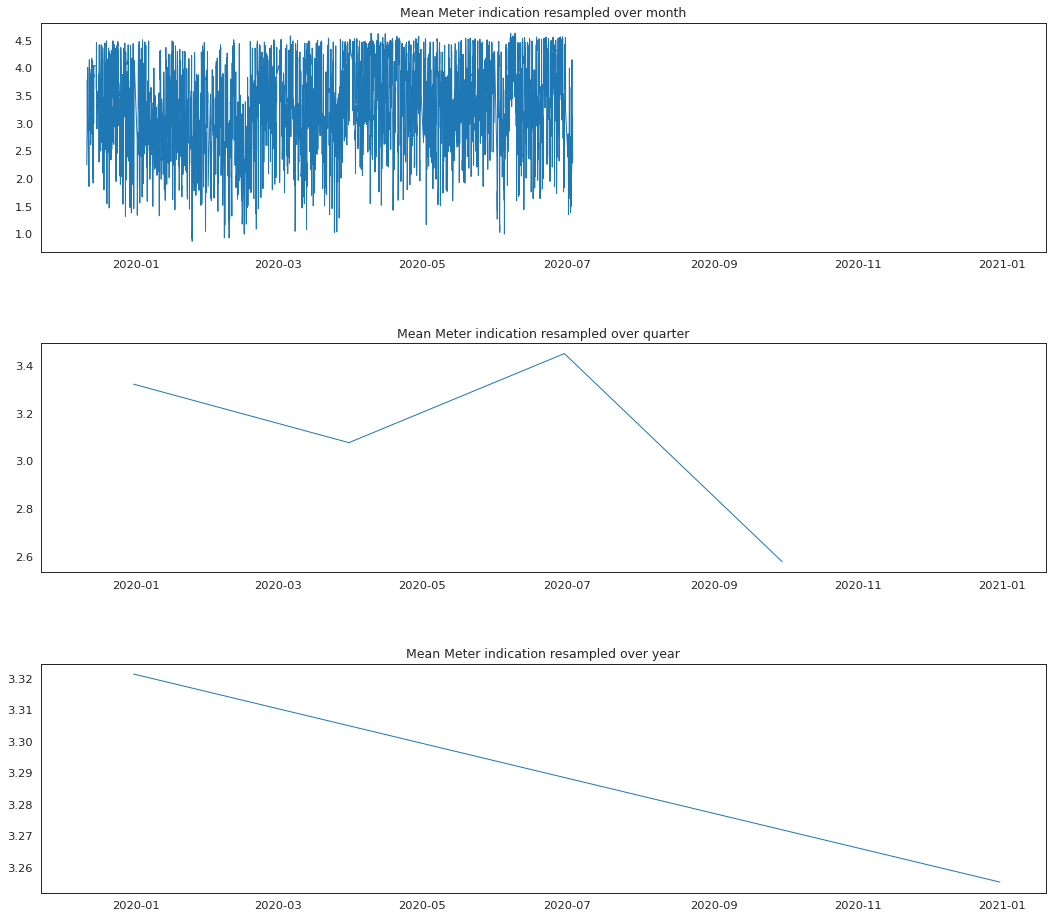

In [281]:

fig = plt.figure(figsize=(18,16))
fig.subplots_adjust(hspace=.4)
ax1 = fig.add_subplot(3,1,1)
ax1.plot(df4['indication'],linewidth=1)
ax1.set_title('Mean Meter indication resampled over month')
ax1.tick_params(axis='both', which='major')

ax2  = fig.add_subplot(3,1,2, sharex=ax1)
ax2.plot(df4['indication'].resample('Q').mean(),linewidth=1)
ax2.set_title('Mean Meter indication resampled over quarter')
ax2.tick_params(axis='both', which='major')

ax3  = fig.add_subplot(3,1,3, sharex=ax1)
ax3.plot(df4['indication'].resample('A').mean(),linewidth=1)
ax3.set_title('Mean Meter indication resampled over year')
ax3.tick_params(axis='both', which='major');

Γενικά, οι χρονοσειρές μας  έχουν γενικά ανοδική  τάση. Η υψηλότερη μέση κατανάλωση νερού ήταν πριν από το 2020

### **Dickey-Fuller Test to Ceck Stationarity**

H δοκιμή Dickey – Fuller δοκιμάζει την μηδενική υπόθεση ότι η μονάδα ρίζας υπάρχει σε ένα autoregressive μοντέλο . Η εναλλακτική υπόθεση είναι διαφορετική ανάλογα με την έκδοση του τεστ που χρησιμοποιείται, αλλά συνήθως είναι σταθερότητα ή σταθερότητα τάσης.

Η σταθερή χρονοσειρά έχει σταθερό μέσο και διακύμανση με την πάροδο του χρόνου. Ο κυλιόμενος μέσος όρος και η τυπική απόκλιση κύλισης των χρονοσειρών δεν αλλάζουν με την πάροδο του χρόνου.

Δοκιμασία Dickey-Fuller Null Hypothesis (H0): Υποδηλώνει ότι οι χρονοσειρές έχουν μια ρίζα μονάδας, που σημαίνει ότι δεν είναι στάσιμη. Έχει κάποια δομή που εξαρτάται από το χρόνο.

Εναλλακτική υπόθεση (H1): Υποδηλώνει ότι οι χρονοσειρές δεν έχουν ρίζα μονάδας, που σημαίνει ότι είναι στάσιμη. Δεν έχει δομή που εξαρτάται από το χρόνο.

p-value> 0,05: Αποδεχτείτε την μηδενική υπόθεση (H0), τα δεδομένα έχουν ρίζα μονάδας και είναι μη στάσιμα.

p-value <= 0,05: Απόρριψη της μηδενικής υπόθεσης (H0), τα δεδομένα δεν έχουν ρίζα μονάδας και είναι στάσιμα

In [288]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=200).mean()
    rolstd = timeseries.rolling(window=200).std()
    
    plt.figure(figsize=(14,5))
    sns.despine(left=True)
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')

    plt.legend(loc='best'); plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

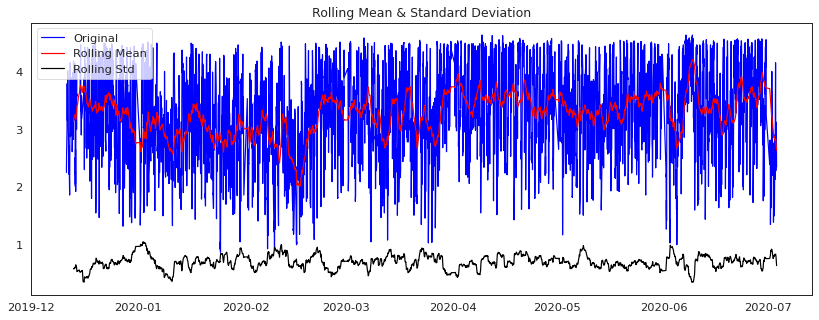

<Results of Dickey-Fuller Test>
Test Statistic                  -23.793
p-value                           0.000
#Lags Used                        7.000
Number of Observations Used   19013.000
Critical Value (1%)              -3.431
Critical Value (5%)              -2.862
Critical Value (10%)             -2.567
dtype: float64


In [289]:
test_stationarity(df4.indication)

Από τα παραπάνω αποτελέσματα, αποδοχή της μηδενικής υπόθεσησ H0, τα δεδομένα  έχουν ρίζα μονάδας και είναι μη στάσιμα.

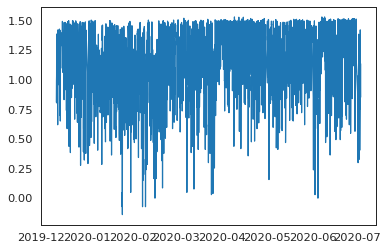

In [290]:
df4_logScale = np.log(df4.indication)
plt.plot(df4_logScale)

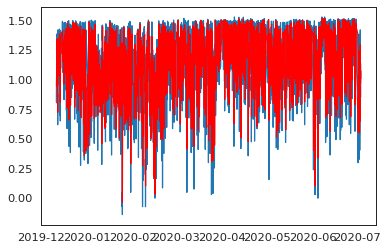

In [291]:

movingAverage = df4_logScale.rolling(window=12).mean()
movingSTD = df4_logScale.rolling(window=12).std()
plt.plot(df4_logScale)
plt.plot(movingAverage, color='red')

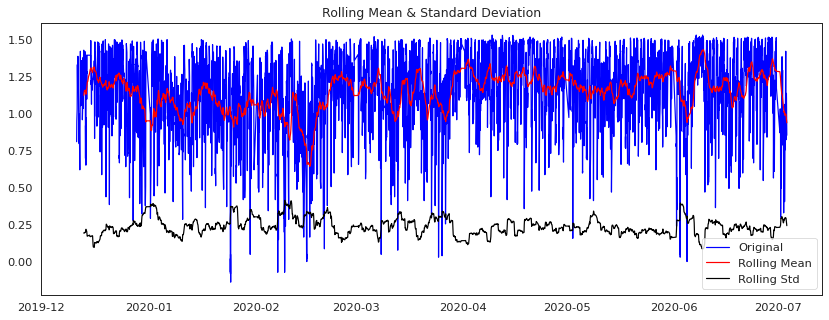

<Results of Dickey-Fuller Test>
Test Statistic                  -23.907
p-value                           0.000
#Lags Used                        7.000
Number of Observations Used   19013.000
Critical Value (1%)              -3.431
Critical Value (5%)              -2.862
Critical Value (10%)             -2.567
dtype: float64


In [293]:
test_stationarity(df4_logScale)

Ο στόχος εδώ θα είναι να προβλέψουμε τιμές για ένα χρονικό διάστημα 12 μήνες,από τα δεδομένα της της κατανάλωσης νερού  μίας παροχής. Θα χρησιμοποιήσουμε ένα multi-layered  νευρωνικό δίκτυο LSTM για να προβλέψουμε την τελευταία τιμή μιας ακολουθίας τιμών.

Παρακάτω στο  σύνολο των δεδομένων, γίνεται ομαλοποίηση , διαχωρισμός σε σύνολα εκπαίδευσης και δοκιμής, μετατρέψτε έναν πίνακα τιμών σε έναν πίνακα δεδομένων χωρις μηδενικές τιμες.

#**LSTM**

Επιλέγουμε logscale ή αρχικες τιμές για να διερευνησουμε τις διαφορες

###logscale τιμες 

In [295]:
dataset = df4_logScale.values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

### Αρχικές τιμές

In [296]:
dataset = df4.indication.values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [297]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [298]:
# reshape into X=t and Y=t+1
look_back = 4
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [299]:
X_train.shape

(15211, 4)

In [300]:
Y_train.shape

(15211,)

In [301]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

### Αρχιτεκτονική Μοντέλου

In [302]:
X_train.shape

(15211, 1, 4)

In [303]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=20, batch_size=120, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3)], verbose=1, shuffle=False)

# Training Phase
model.summary()

Epoch 1/20
127/127 [==============================] - 3s 9ms/step - loss: 0.1839 - val_loss: 0.0072
Epoch 2/20
127/127 [==============================] - 1s 5ms/step - loss: 0.0088 - val_loss: 0.0062
Epoch 3/20
127/127 [==============================] - 1s 5ms/step - loss: 0.0077 - val_loss: 0.0051
Epoch 4/20
127/127 [==============================] - 1s 5ms/step - loss: 0.0066 - val_loss: 0.0041
Epoch 5/20
127/127 [==============================] - 1s 5ms/step - loss: 0.0055 - val_loss: 0.0032
Epoch 6/20
127/127 [==============================] - 1s 5ms/step - loss: 0.0044 - val_loss: 0.0022
Epoch 7/20
127/127 [==============================] - 1s 5ms/step - loss: 0.0034 - val_loss: 0.0018
Epoch 8/20
127/127 [==============================] - 1s 5ms/step - loss: 0.0030 - val_loss: 0.0017
Epoch 9/20
127/127 [==============================] - 1s 5ms/step - loss: 0.0029 - val_loss: 0.0017
Epoch 10/20
127/127 [==============================] - 1s 5ms/step - loss: 0.0027 - val_loss: 0.0016

In [304]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 0.08939983397478908
Train Root Mean Squared Error: 0.13122388765093926
Test Mean Absolute Error: 0.08902271001256781
Test Root Mean Squared Error: 0.13544820399552068


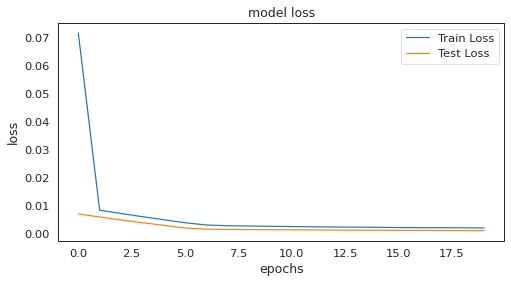

In [305]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

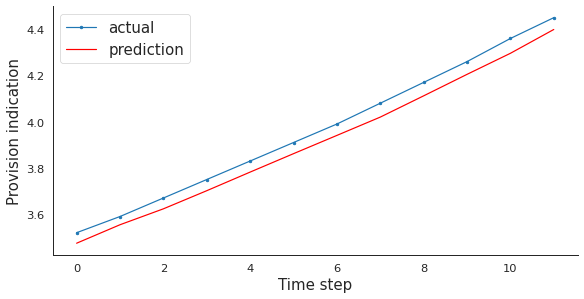

In [306]:
aa=[x for x in range(12)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:12], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:12], 'r', label="prediction")
plt.tick_params(left=False, labelleft=True) 
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Provision indication', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();